# Principios de análisis multivariado

## Objetivos

1. Resumir el conjunto de variables en pocas nuevas variables, construidas como transformaciones de las originales, con la mínima perdida de información.
2. Encontrar grupos en los datos si existen.
3. Clasificar nuevas observaciones en grupos definidos.
4. Relacionar dos conjuntos de variables.

### Ejemplo 1

Se resume la cantidad total de medidas del cuerpo humano en 5 varibles:
- Altura
- Peso
- Talla de camiseta
- Talla de pantalón
- Talla de calzado

![Medidas completas del ser humano](project_multi_cuanti/images/R_00.png)

### Ejemplo 2

| Variables Originales | Nueva variable |
| :---: | :---: |
|  Ubicación geográfica <br> Estrato <br> Vivienda digna <br> Servicios públicos a los que tiene acceso <br>  Infraestructura y aparato estatal que lo rodea | Puntaje SISBEN |

## Ventajas de usar una cantidad suficiente de varibles informativas
- Es más fácil de manejar
- Es más fácil de interpretar
- Es más fácil de comparar

## Encontrar similitudes y armar grupos es muy útil

- Todos somos únicos e irrepetibles
- Hay patrones
![Grupos en un conjunto de datos](project_multi_cuanti/images/R_01.png)

### Ejemplos de agrupaciones de datos

- **Administración de empresas:** Construir tipologías de clientes.
- **Agricultura:** Clasificar terrenos de cultivo por fotos aéreas.
- **Ciencias de la computación:** Diseñar algoritmos de clasificación automática.
- **Ciencias del medio ambiente:** Investigar las dimensiones de la contaminación ambiental.
- **Economía:** Identificar las dimensiones del desarrollo económico.
- **Geología:** Clasificar sedimentos.
- **Ingeniería:** Transmitir óptimamente señales por canales digitales.
- **Medicina:** Clasificar tumores mediante imágenes digitales.
- **Sociología y Ciencia Política:** Construir tipologías de los votantes de un partido.

![Tabla parte 1](project_multi_cuanti/images/R_02.png)

![Tabla parte 2](project_multi_cuanti/images/R_03.png)

## Algunas consideraciones del análisis multivariado

- Como hemos visto el modelado estadístico es matricial.
- Cada fila en las matrices de datos es una **variables aleatoria**, y por tanto, cada una tiene una distribución de probabilidad asociada.
- Detrás hay bastante cálculo, algebra lineal y geometría.
- **¡También hay supuestos!**

## Instalar librerías

In [1]:
# install.packages("Amelia") #Visualización datos perdidos
# install.packages("mvnmle")
# install.packages("BaylorEdPsych")
# install.packages("reshape2") # Transformaciones entre objetos
# install.packages("FactoMineR") # Análisis factorial
# install.packages("factoextra")
# install.packages("corrplot")

## Librerías utilizadas durante la clase:
- [readxl](https://github.com/tidyverse/readxl): Facilita la extracción de datos de Excel y los lleva a R, no tiene dependencias externas, por lo que es fácil de instalar y usar en todos los sistemas operativos. 
- [tydiverse](https://github.com/tidyverse/tidyverse): Es un conjunto de paquetes en R diseñados para ciencia de datos. Esto lo que significa es que ayuda en todo el proceso de importar transformar visualizar modelar y comunicar toda la información que normalmente utilizamos en procesos de ciencia de datos.
- [Amelia](https://github.com/cran/Amelia): Es un paquete R para la imputación múltiple de datos incompletos multivariados. Utiliza un algoritmo que combina bootstrapping y el algoritmo EM para tomar extracciones de la parte posterior de los datos faltantes. El paquete Amelia incluye transformaciones de normalización, a priori a nivel de celda y métodos para manejar datos transversales de series de tiempo.
- [mvnmle](https://mran.microsoft.com/snapshot/2017-04-22/web/packages/mvnmle/mvnmle.pdf): Encuentra la estimación de máxima verosimilitud del vector medio y la matriz de varianza-covarianza para datos normales multivariados con valores perdidos. - [Instalación](https://cran.r-project.org/src/contrib/Archive/mvnmle/)
- **BaylorEdPsych:** Funciones y datos R para los cursos cuantitativos del Departamento de Psicología Educativa de la Universidad de Baylor - [Instalación](https://cran.r-project.org/src/contrib/Archive/BaylorEdPsych/)
- [car](https://www.rdocumentation.org/packages/car/versions/1.2-16):  El paquete contiene principalmente funciones para regresión aplicada, modelos lineales y modelos lineales generalizados, con énfasis en el diagnóstico de regresión, en particular los métodos de diagnóstico gráfico.
- [ggplot2](https://github.com/tidyverse/ggplot2): Es un sistema para crear gráficos de forma declarativa, basado en The Grammar of Graphics.
- [GGally](https://github.com/cran/GGally): Extiende ggplot2 agregando varias funciones para reducir la complejidad de combinar geoms con datos transformados.
- [reshape2](https://github.com/cran/reshape2): Paquete de remodelación de datos.
- [FactoMineR](http://factominer.free.fr/index.html): Es un paquete R dedicado al análisis de datos exploratorios multivariante.
- [factoextra](): Facilita la extracción y visualización del resultado de análisis de datos multivariados exploratorios, que incluyen:
  - Análisis de componentes principales.
  - Análisis de correspondencia.
  - Análisis de correspondencia múltiple.
  - Análisis de factores múltiples.
  - Análisis jerárquico de factores múltiples.
  - Análisis factorial de datos mixtos.
- [corroplot](https://github.com/taiyun/corrplot): Es para visualizar matrices de correlación e intervalos de confianza. También contiene algunos algoritmos para reordenar matrices.

## Cargar librerías

In [2]:
library("readxl")
library("tidyverse")
library("Amelia")
library("mvnmle")
library("BaylorEdPsych")
library("car")
library("ggplot2")
library("GGally")
library("reshape2")
library("FactoMineR")
library("factoextra")
library("corrplot")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.7.6, built: 2019-11-24)
## Copyright (C) 2005-2020 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

In [3]:
# install.packages("repr")
library("repr")
options(repr.plot.width = 14, repr.plot.height=10)

## Importar datos

In [4]:
read_xlsx(
  path = "project_multi_cuanti/data/Boston_Housing.xlsx", 
  sheet="Data"
) -> boston

## Revisar la estructura inicial de los datos
str(boston)

tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : num [1:506] 0 0 0 0 0 0 0 0 0 0 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [5]:
## Convierto variables respectivas a factores
factores <- c("CHAS")
boston %>% mutate_at(factores,factor) -> data

## Revisar la estructura actualizada de los datos
str(data)

tibble [506 × 14] (S3: tbl_df/tbl/data.frame)
 $ CRIM   : num [1:506] 0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ ZN     : num [1:506] 18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ INDUS  : num [1:506] 2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ CHAS   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ NOX    : num [1:506] 0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ RM     : num [1:506] 6.58 6.42 7.18 7 7.15 ...
 $ AGE    : num [1:506] 65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ DIS    : num [1:506] 4.09 4.97 4.97 6.06 6.06 ...
 $ RAD    : num [1:506] 1 2 2 3 3 3 5 5 5 5 ...
 $ TAX    : num [1:506] 296 242 242 222 222 222 311 311 311 311 ...
 $ PTRATIO: num [1:506] 15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ B      : num [1:506] 397 397 393 395 397 ...
 $ LSTAT  : num [1:506] 4.98 9.14 4.03 2.94 5.33 ...
 $ MEDV   : num [1:506] 24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [6]:
## Le decimos a R que vamos a trabajar con esos datos y se los ponemos "en primer plano"
attach(data)

## Veamos los primeros registros
head(data)

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


## Información sobre el conjunto de datos

### Información general

Los datos de la vivienda contienen 506 secciones censales de Boston del censo de 1970. La base de datos Boston Housing contiene los datos originales de Harrison y Rubinfeld (1979).

#### Variables

- **CRIM:** crimen per cápita por ciudad
- **ZN:** proporción de terrenos residenciales divididos en zonas para lotes de más de 25,000 pies cuadrados
- **INDUS:** proporción de acres de negocios no minoristas por ciudad
- **CHAS:** variable dummy de Charles River (= 1 si el limita con el río, 0 de lo contrario)
- **NOX:** concentración de óxidos nítricos (partes por 10 millones)
- **RM:** número promedio de habitaciones por vivienda
- **AGE:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940
- **DIS:** distancias ponderadas a cinco centros de empleo de Boston
- **RAD:** índice de accesibilidad a las autopistas radiales
- **TAX:** tasa de impuesto a la propiedad de valor completo por USD 10,000
- **PTRATIO:** proporción de estudiantes por profesor
- **B:** 1000*(Bk - 0,63)^ 2, donde Bk es la proporción de negros por ciudad
- **LSTAT:** porcentaje de población clase baja (menores ingresos)
- **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios (en miles de dólares). Esta es la variable objetivo.

#### Fuente

Harrison, D. and Rubinfeld, D.L. (1978). Hedonic prices and the demand for clean air. Journal of Environmental Economics and Management, 5, 81–102.

## Dimensionalidad de los datos

In [7]:
dim(data)

[1] 506  14

- 506 municipios/pueblos - Número de filas
- 14 variables - Número de columnas

## Limpieza de datos

### Datos faltantes

Vamos a comprobar datos faltantes sumando NA por columna (es decir, para cada variable) y además los graficaremos mediante el método **missmap()** de la librería Amelia.

In [8]:
## Conteo de datos faltantes por variable
data %>% map_df(is.na) %>% colSums()

CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS     RAD     TAX 
      0       0       0       0       0       0       0       0       0       0 
PTRATIO       B   LSTAT    MEDV 
      0       0       0       0

Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `arguments`.”


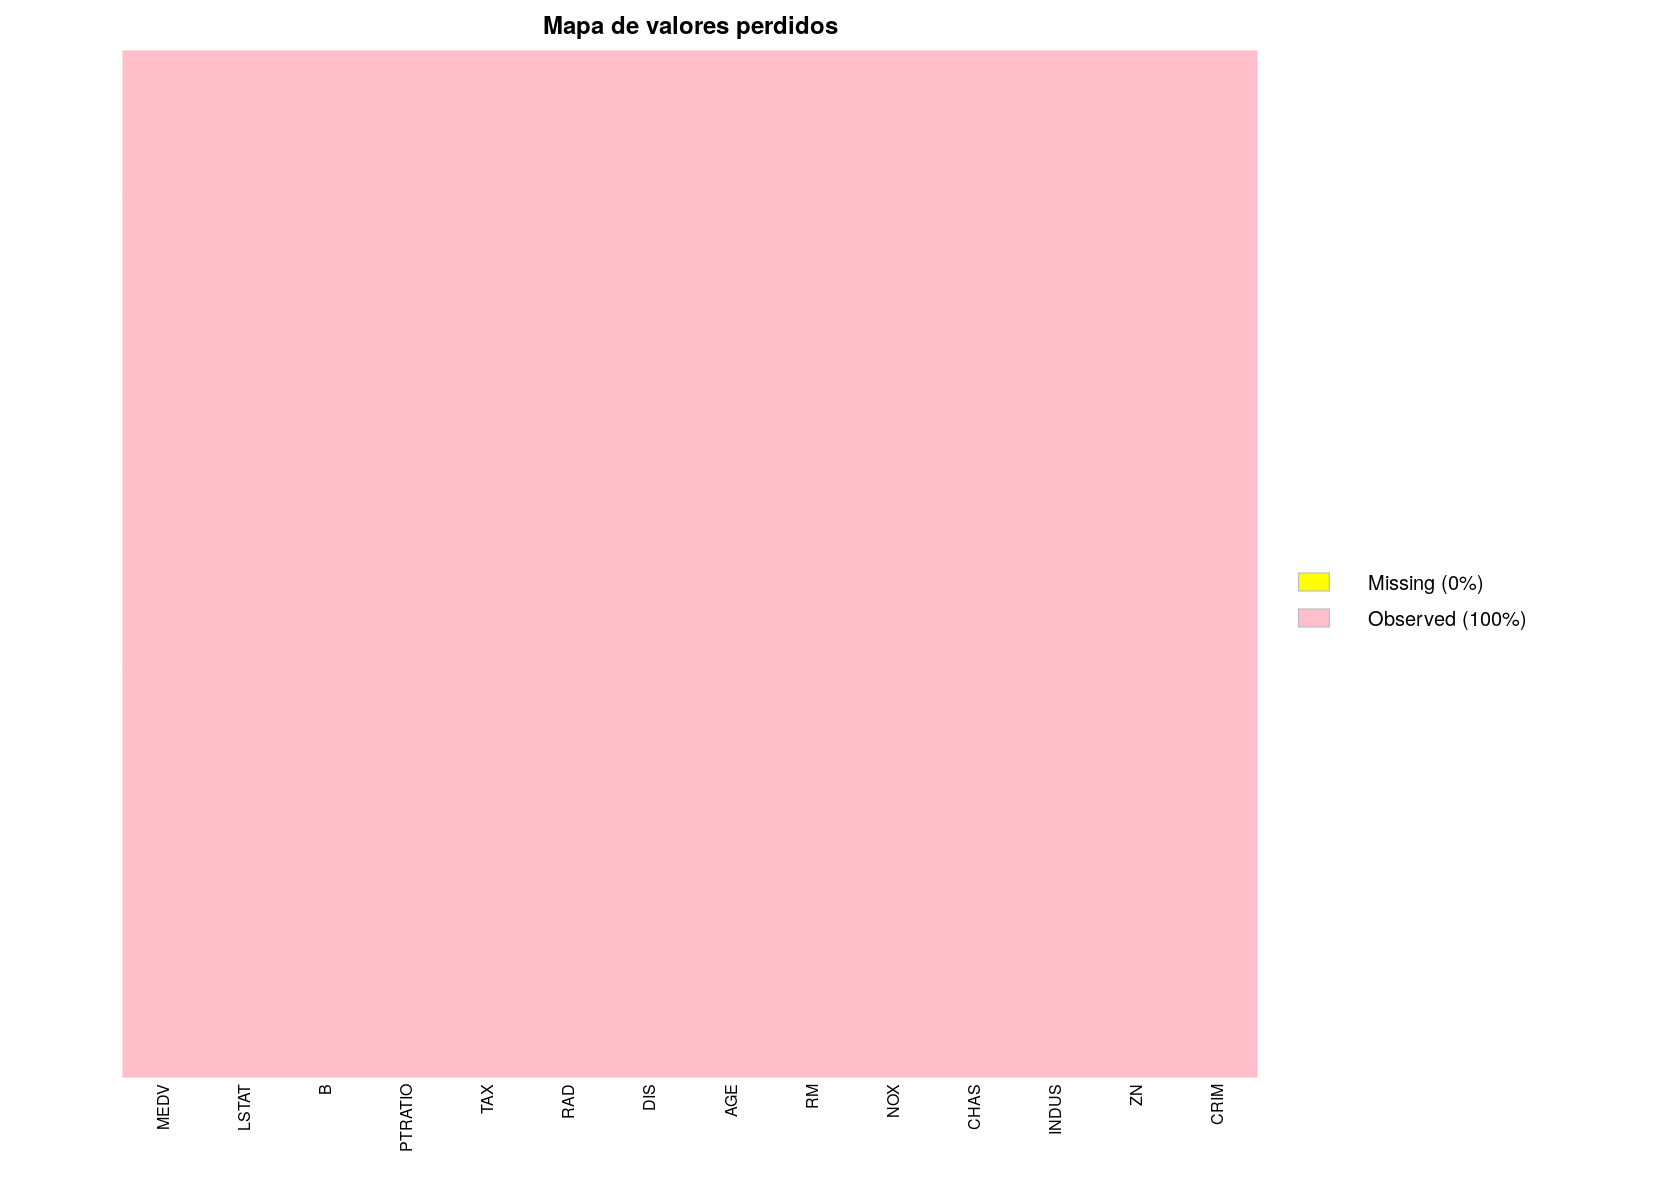

In [9]:
## Gráfica de datos faltantes
missmap(data, 
        col=c('yellow','pink'),
        main='Mapa de valores perdidos',
        y.at=1,
        y.labels='',
        legend=TRUE)

En este caso no hay datos perdidos. Sin embargo, en muchos casos de la vida real es posible que nos falten datos. Si son pocos los faltantes los podemos imputarlos, si son muchos surgen dos escenarios:

- Que los datos faltantes sean aleatorios. En esos casos se podrían correr métodos de imputación múltiple (p.e. MICE).
- Que hayan patrones de pérdida de datos, lo que puede indicar un problema en la recolección, captura y distribución de la base de datos.


### Datos atípicos

Para detectar datos atípicos podemos seguir dos caminos:

- Buscar datos atípicos para cada variable (columna). Para esto podríamos usar boxplots.
- Buscar filas que consistentemente tengan datos atípicos en todas las celdas.

Dado que el camino de revisar cada variable ya sabemos cómo hacerlo, miremos el segundo camino que es propio del análisis multivariado.

Para esto vamos a definir la **distancia de Cook**: dado un modelo de regresión, se calcula la influencia ejercida por cada fila en el resultado previsto y el interés es detectar filas cuyos resultados observados sean muy distintos a los resultados predichos.

In [10]:
modelo.regresion <- lm(MEDV ~ ., data=data)
cooksd <- cooks.distance(modelo.regresion)

En ese sentido, diremos que tendremos una fila que representa una onservación atípica si el valor observado es superior a 4 veces el promedio (no es un límite estricto).

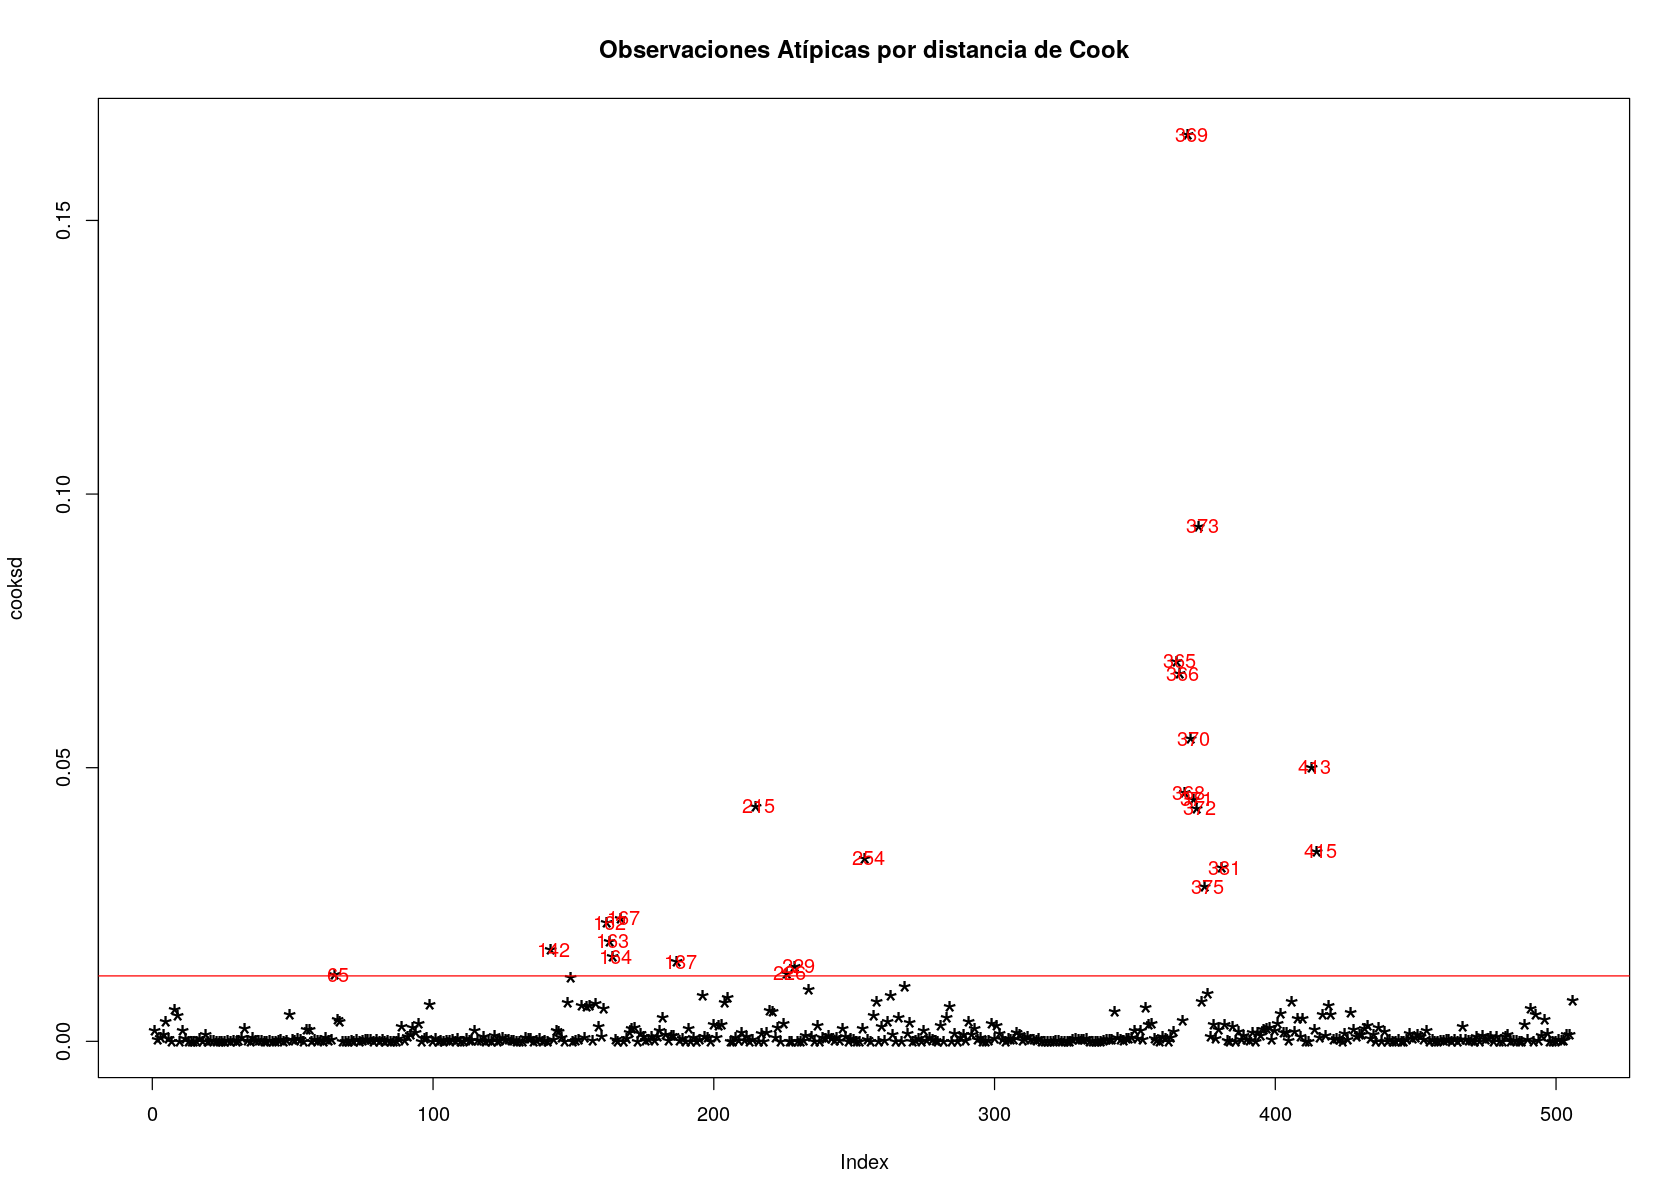

In [11]:
# Gráfica de la distancia de Cook
plot(cooksd, pch="*", cex=2, main="Observaciones Atípicas por distancia de Cook") 
# Superponemos el límite definido
abline(h = 4*mean(cooksd, na.rm=T), col="red")  
# Agregamos etiquetas de identificación para observaciones atípicas
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red") 

In [12]:
## Número de filas a revisar
atipicas <- which((cooksd>4*mean(cooksd, na.rm=T)) == "TRUE")
atipicas

65 142 162 163 164 167 187 215 226 229 254 365 366 368 369 370 371 372 373 375 
 65 142 162 163 164 167 187 215 226 229 254 365 366 368 369 370 371 372 373 375 
381 413 415 
381 413 415

Esta revisión de filas depende del problema en estudio. En este caso, es posible que existan viviendas demasiado costosas cuyo precio esté influenciado por otras variables.

Además, hay que tener en cuenta que estos datos corresponden a un **censo** y en los censos puede haber numerosos casos excepcionales.

La revisión y las decisiones que tome el analista cambiarían sustancialmente si los datos en cambio provinieran de una **muestra probabilística**, en las cuales los datos atípicos son menos frecuentes.

## Análisis descriptivo

In [13]:
## Resumen básico de datos
summary(data)

      CRIM                ZN             INDUS       CHAS         NOX        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   0:471   Min.   :0.3850  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1: 35   1st Qu.:0.4490  
 Median : 0.25651   Median :  0.00   Median : 9.69           Median :0.5380  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14           Mean   :0.5547  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10           3rd Qu.:0.6240  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74           Max.   :0.8710  
       RM             AGE              DIS              RAD        
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 1.000  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100   1st Qu.: 4.000  
 Median :6.208   Median : 77.50   Median : 3.207   Median : 5.000  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.795   Mean   : 9.549  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188   3rd Qu.:24.000  
 Max.   :8.780   Max.   :100.00   Max.   :12.1

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



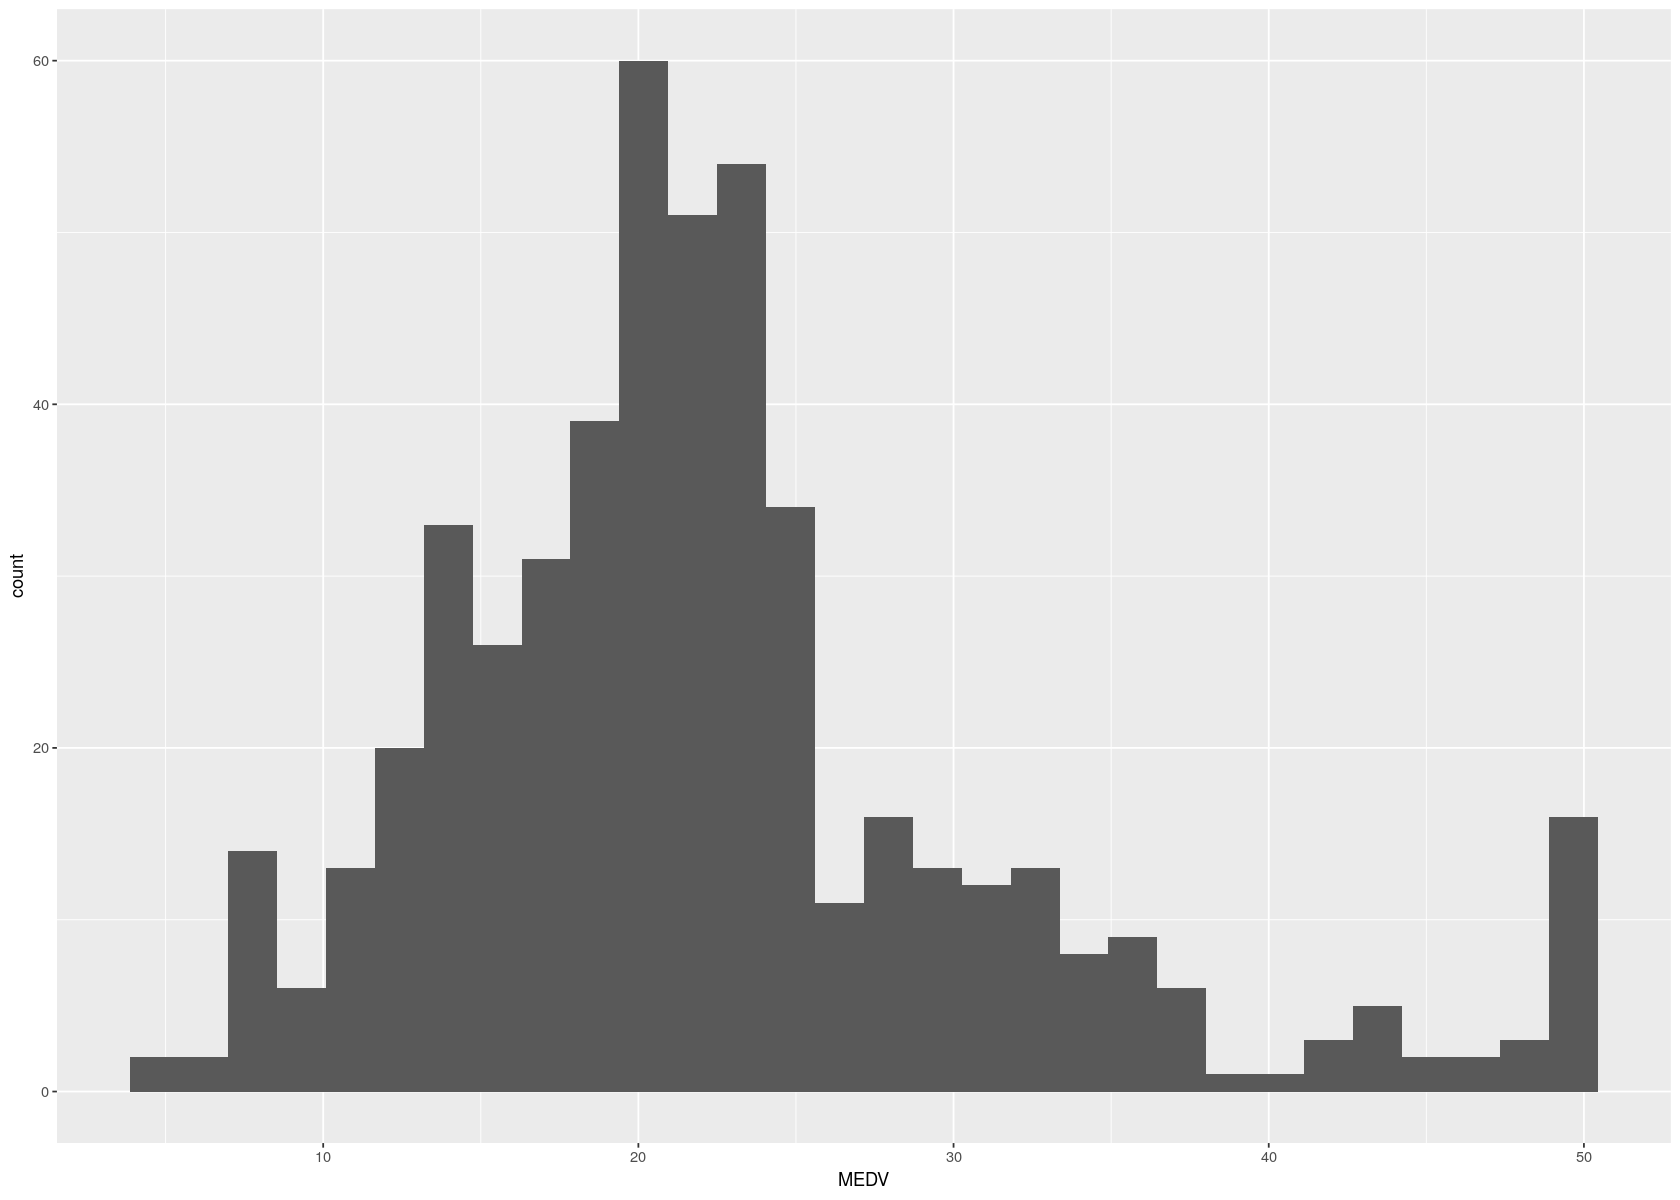

In [14]:
## Resumen gráfico
## Usamos el método para graficar histogramas
## Seleccionamos como objetivo la variable quality
ggplot(data, aes(MEDV)) +
    geom_histogram()

Warning message in ggcorr(data, method = c("everything", "spearman"), size = 3):
“data in column(s) 'CHAS' are not numeric and were ignored”


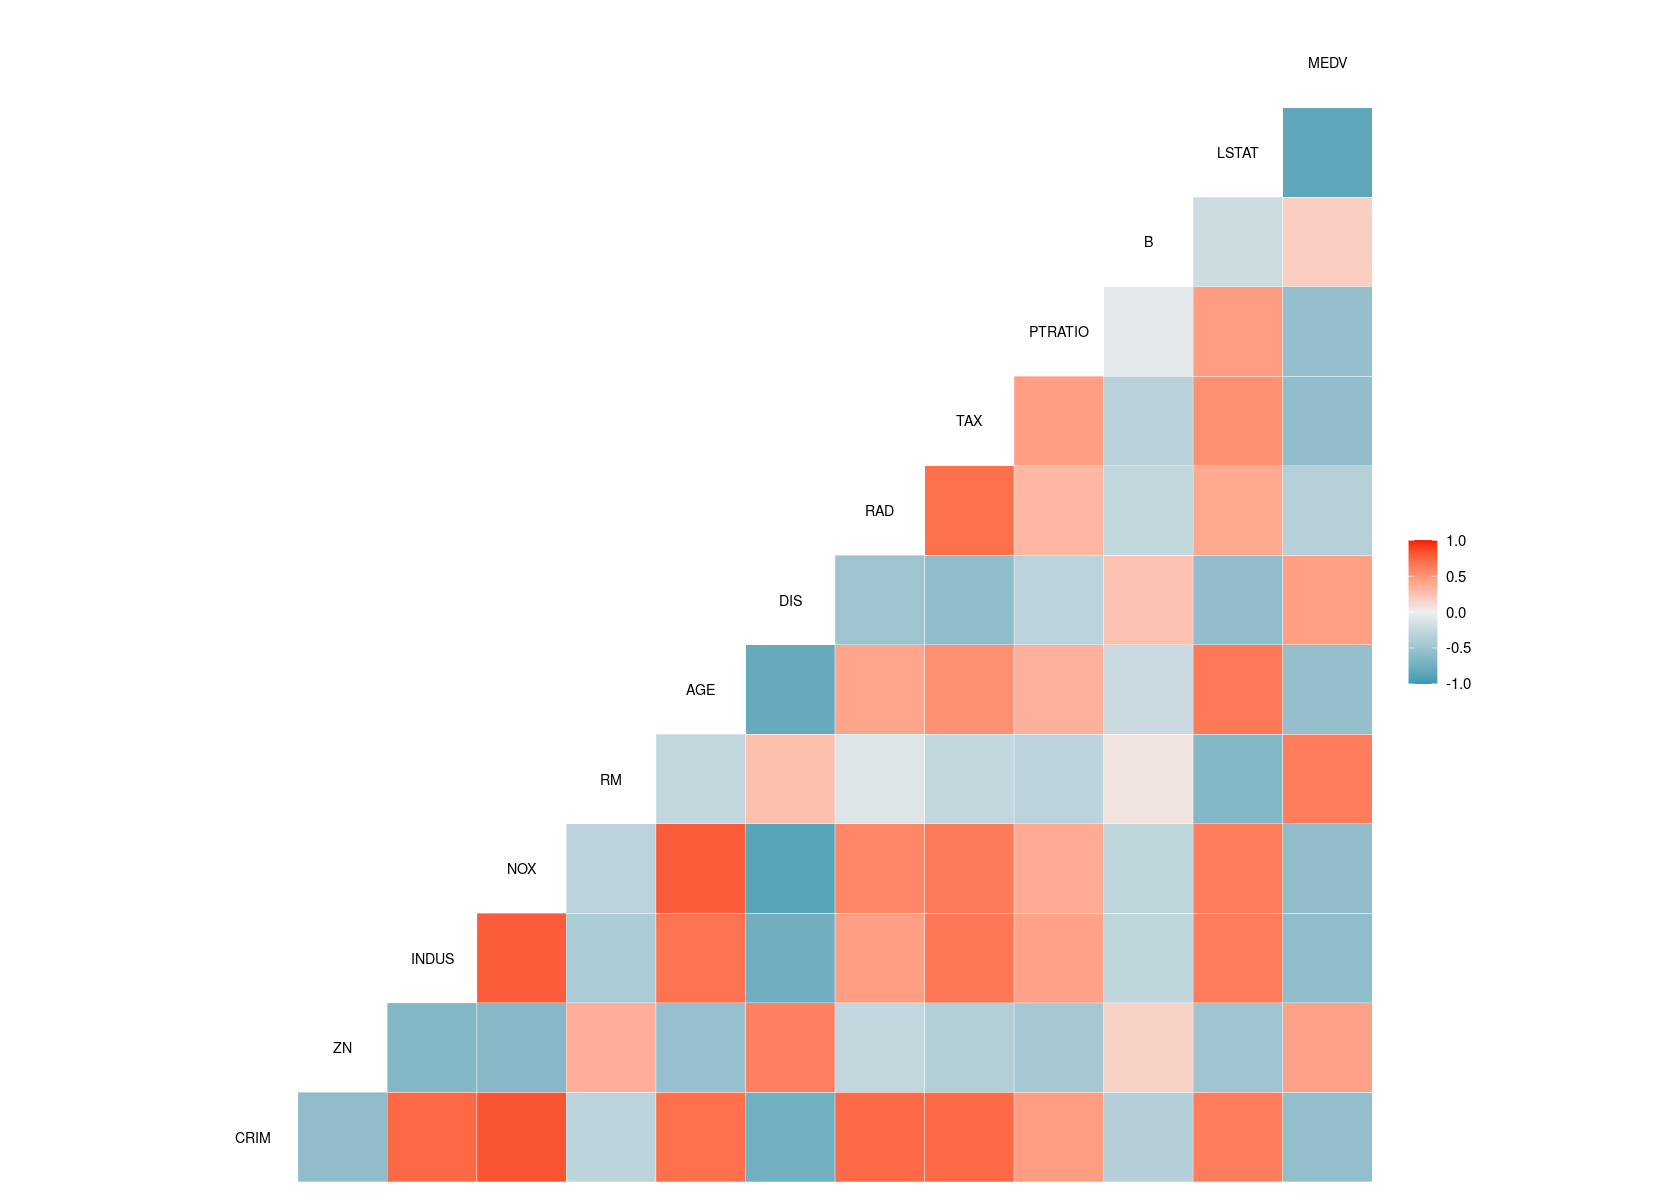

In [15]:
## Correlogramas
ggcorr(
  data, 
  method = c("everything", "spearman"),
  size = 3
  )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



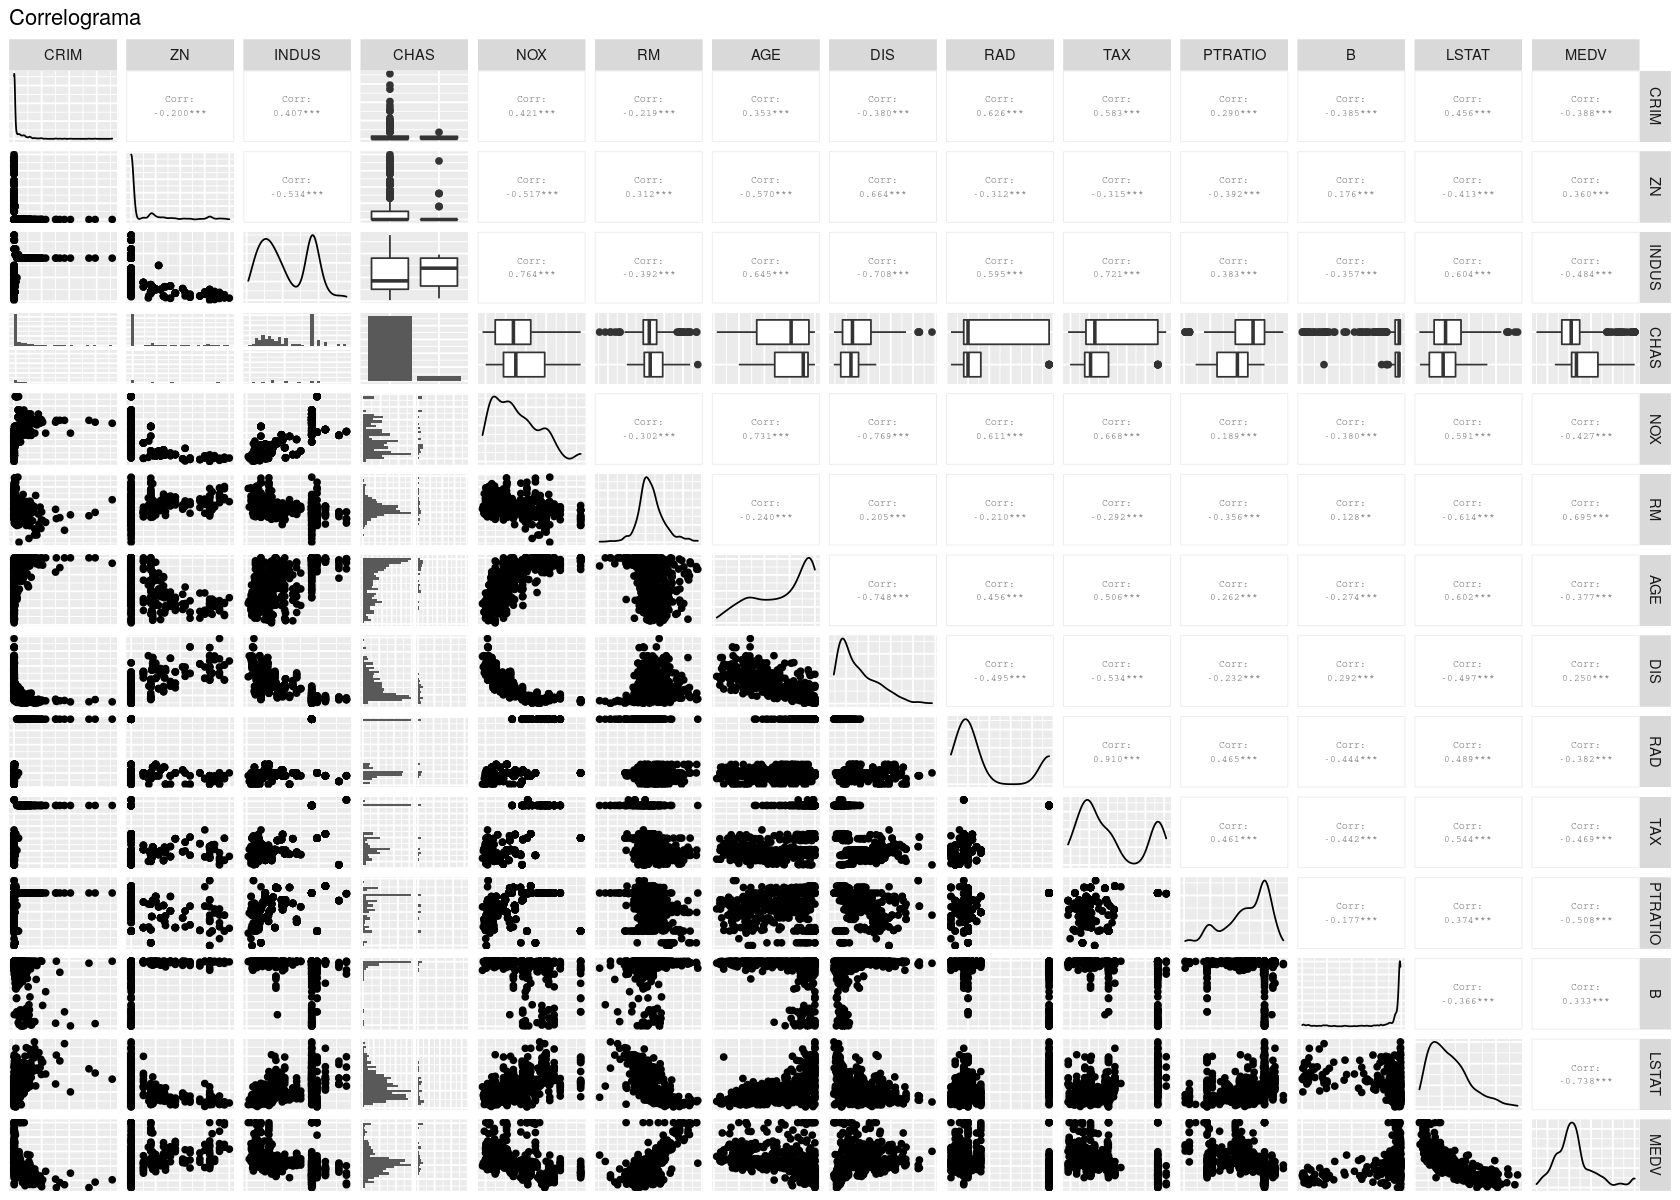

In [16]:
ggpairs(
  data, 
  title="Correlograma",
  axisLabels = "none",
  upper = list(continuous = wrap("cor", size = 2))
  )

Dado que tenemos numerosas variables altamente correlacionadas con nuestra variable de respuesta, podemos hacer un filtro más fuerte y descartar aquellas que tengan una correlación menor a 0.35 en valor absoluto. En ese orden de ideas descartaremos las variables **DIS** y **B**.

### Efecto de las variables

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.5”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 13”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  2.9038e-31”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 156.25”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“pseudoinverse used at -0.5”
Warning message in predLoess(object$y, object$x, newx = if (is.null(newdata)) object$x else if (is.data.frame(newdata)) as.matrix(model.frame(delete.response(terms(object)), :
“neighborhood radius 13”
Warning message in predLo

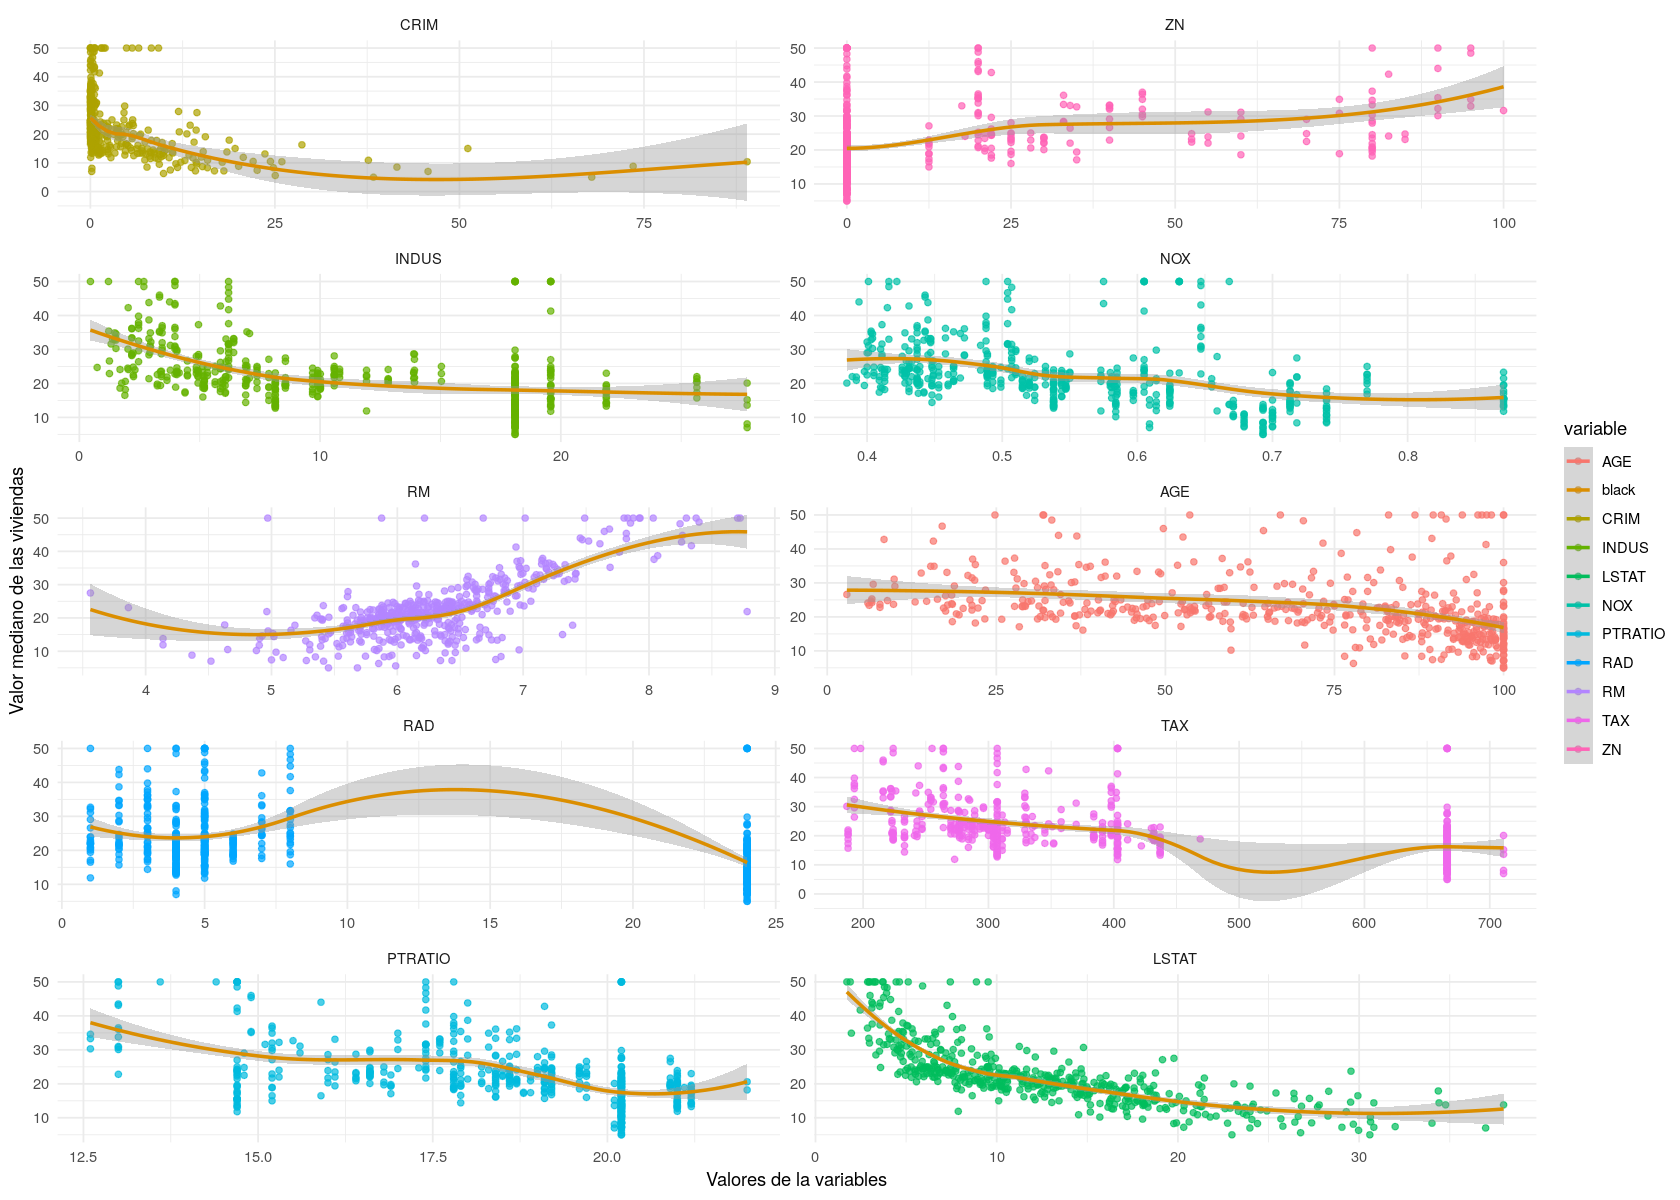

In [17]:
data %>%
  select(c(CRIM, ZN, INDUS, NOX, RM, AGE, RAD, TAX, PTRATIO, LSTAT, MEDV)) %>%
  melt(id.vars = "MEDV") %>%
  ggplot(aes(x = value, y = MEDV, colour = variable)) +
  geom_point(alpha = 0.7) +
  stat_smooth(aes(colour = "black")) +
  facet_wrap(~variable, scales = "free", ncol = 2) +
  labs(x = "Valores de la variables", y = "Valor mediano de las viviendas") +
  theme_minimal()

## Ajuste de un modelo de regresión múltiple

In [18]:
modelo <- lm(MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + RAD + TAX + PTRATIO + LSTAT, data = data)

## Resumen del modelo
summary(modelo)


Call:
lm(formula = MEDV ~ CRIM + ZN + INDUS + NOX + RM + AGE + RAD + 
    TAX + PTRATIO + LSTAT, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.7789  -3.1452  -0.7711   1.9299  28.0633 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  28.916271   4.879364   5.926 5.81e-09 ***
CRIM         -0.099421   0.034788  -2.858 0.004445 ** 
ZN            0.006057   0.013503   0.449 0.653928    
INDUS         0.132339   0.064195   2.062 0.039775 *  
NOX         -10.300472   3.925692  -2.624 0.008962 ** 
RM            4.108519   0.442563   9.283  < 2e-16 ***
AGE           0.035199   0.013518   2.604 0.009493 ** 
RAD           0.320195   0.070715   4.528 7.47e-06 ***
TAX          -0.014832   0.004008  -3.700 0.000239 ***
PTRATIO      -1.070387   0.139284  -7.685 8.29e-14 ***
LSTAT        -0.579745   0.053665 -10.803  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.1 on 495 degree

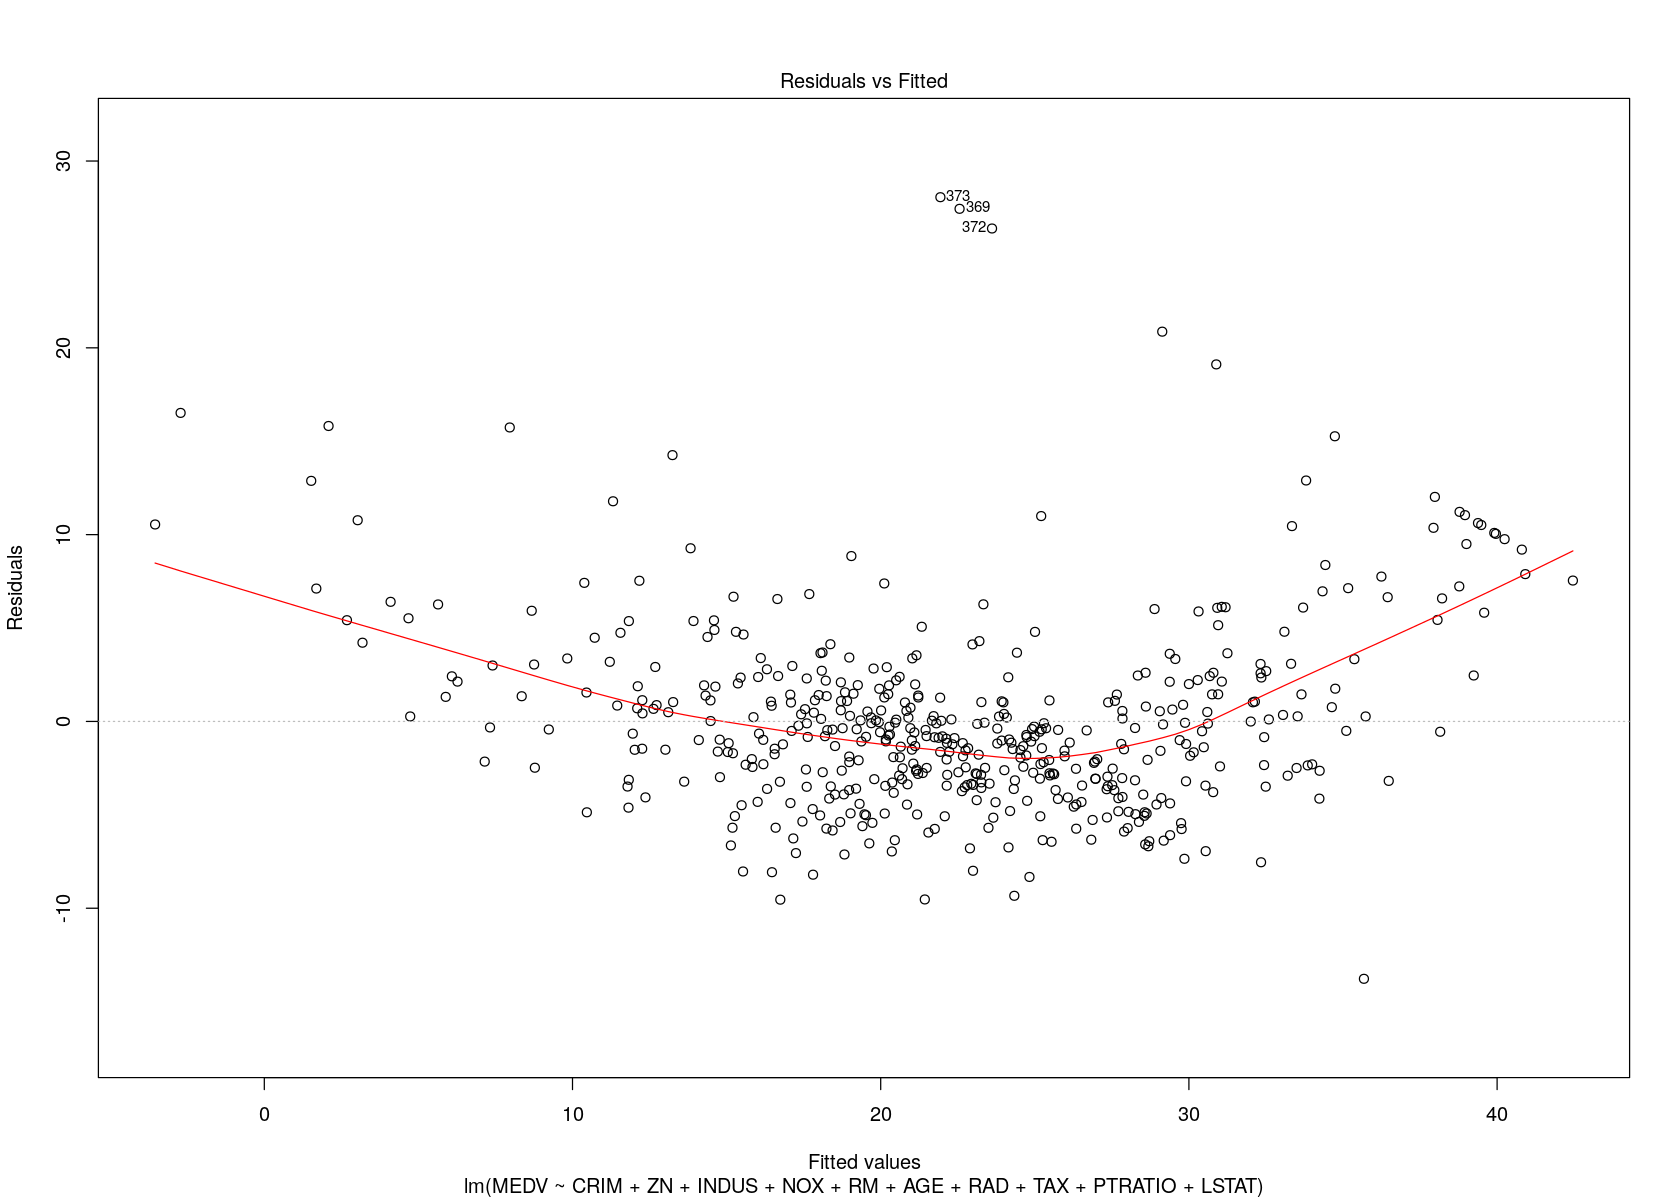

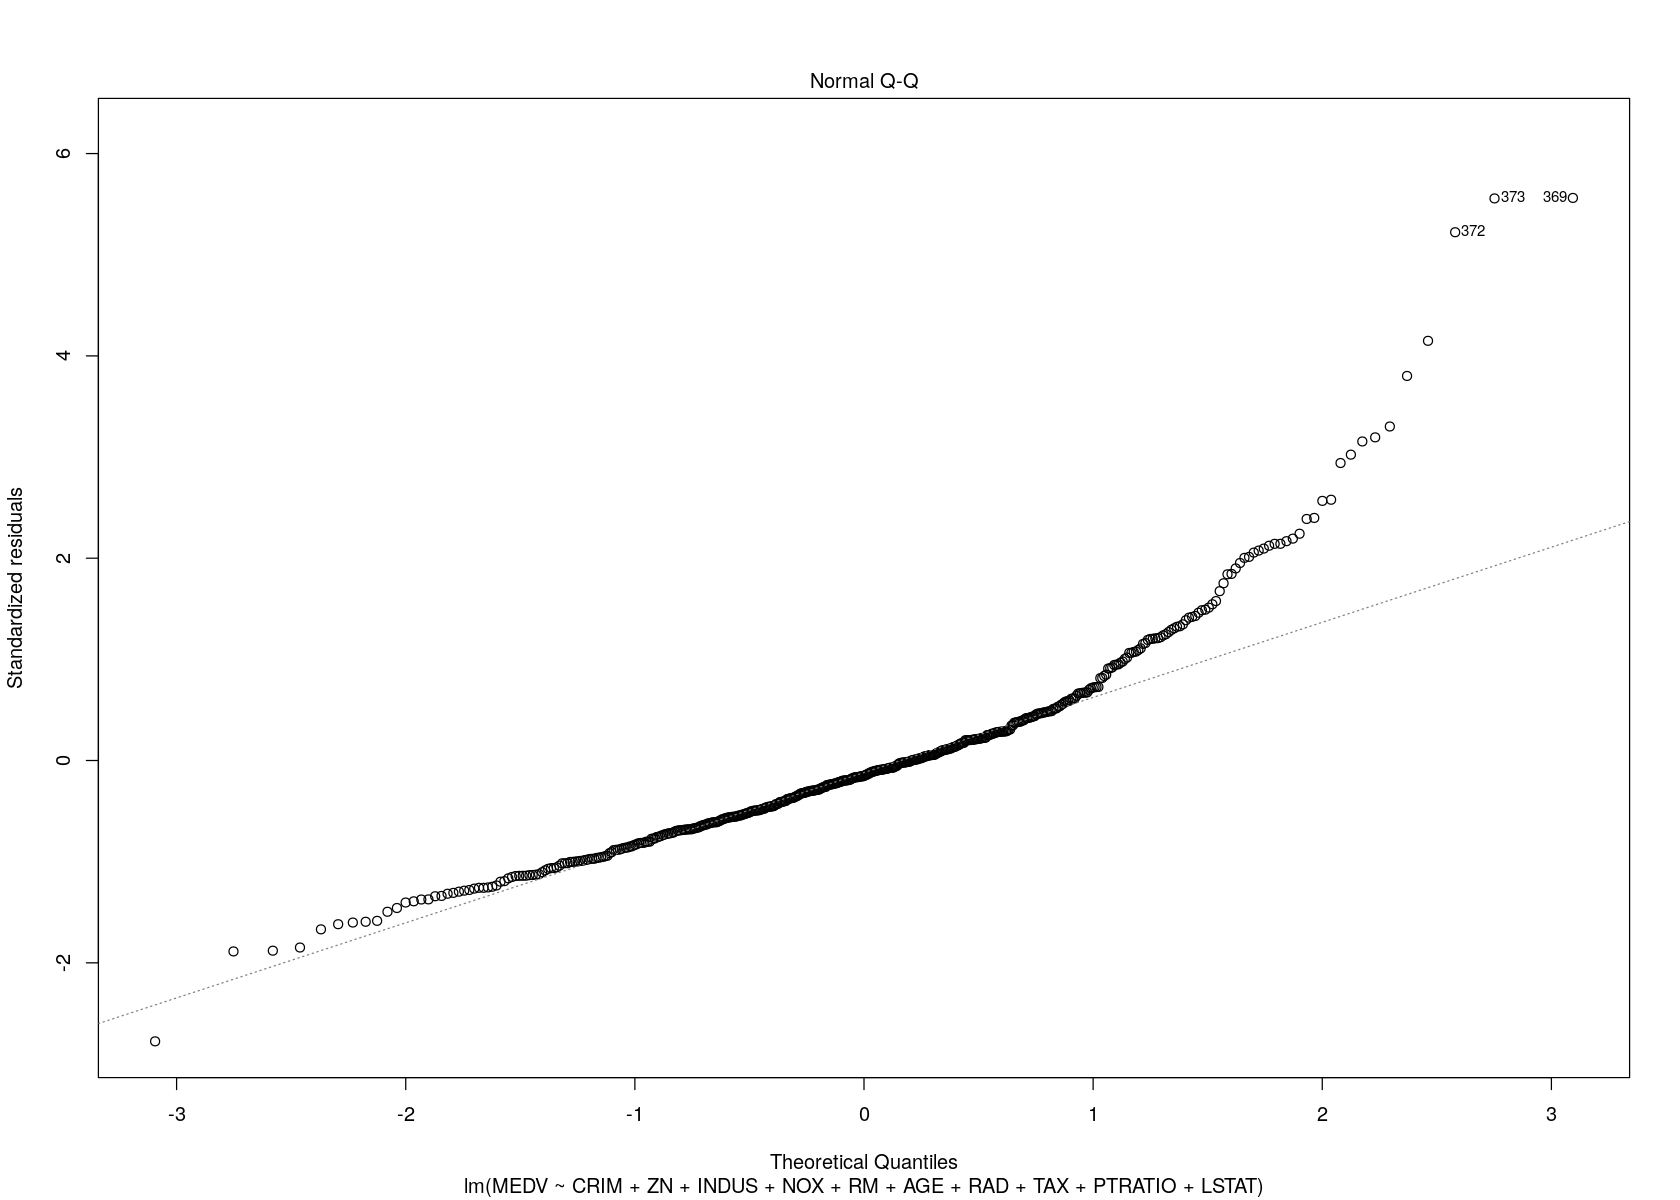

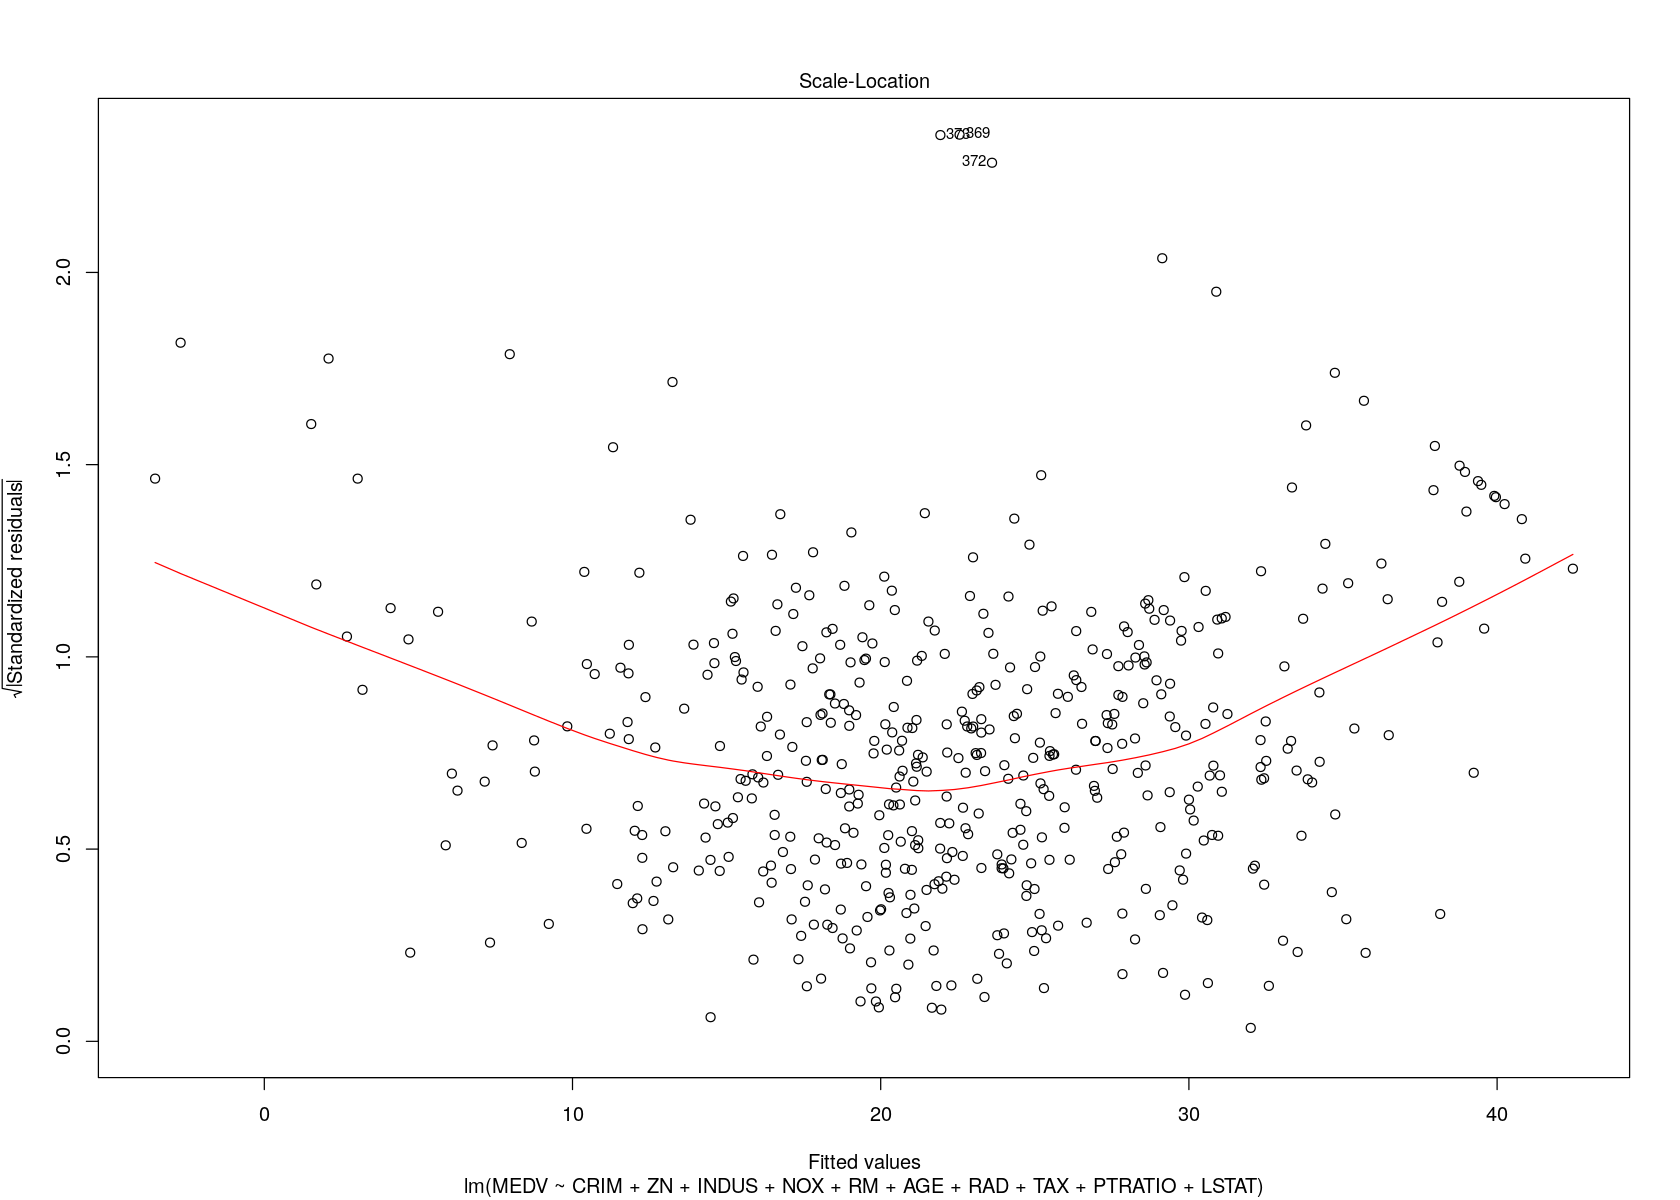

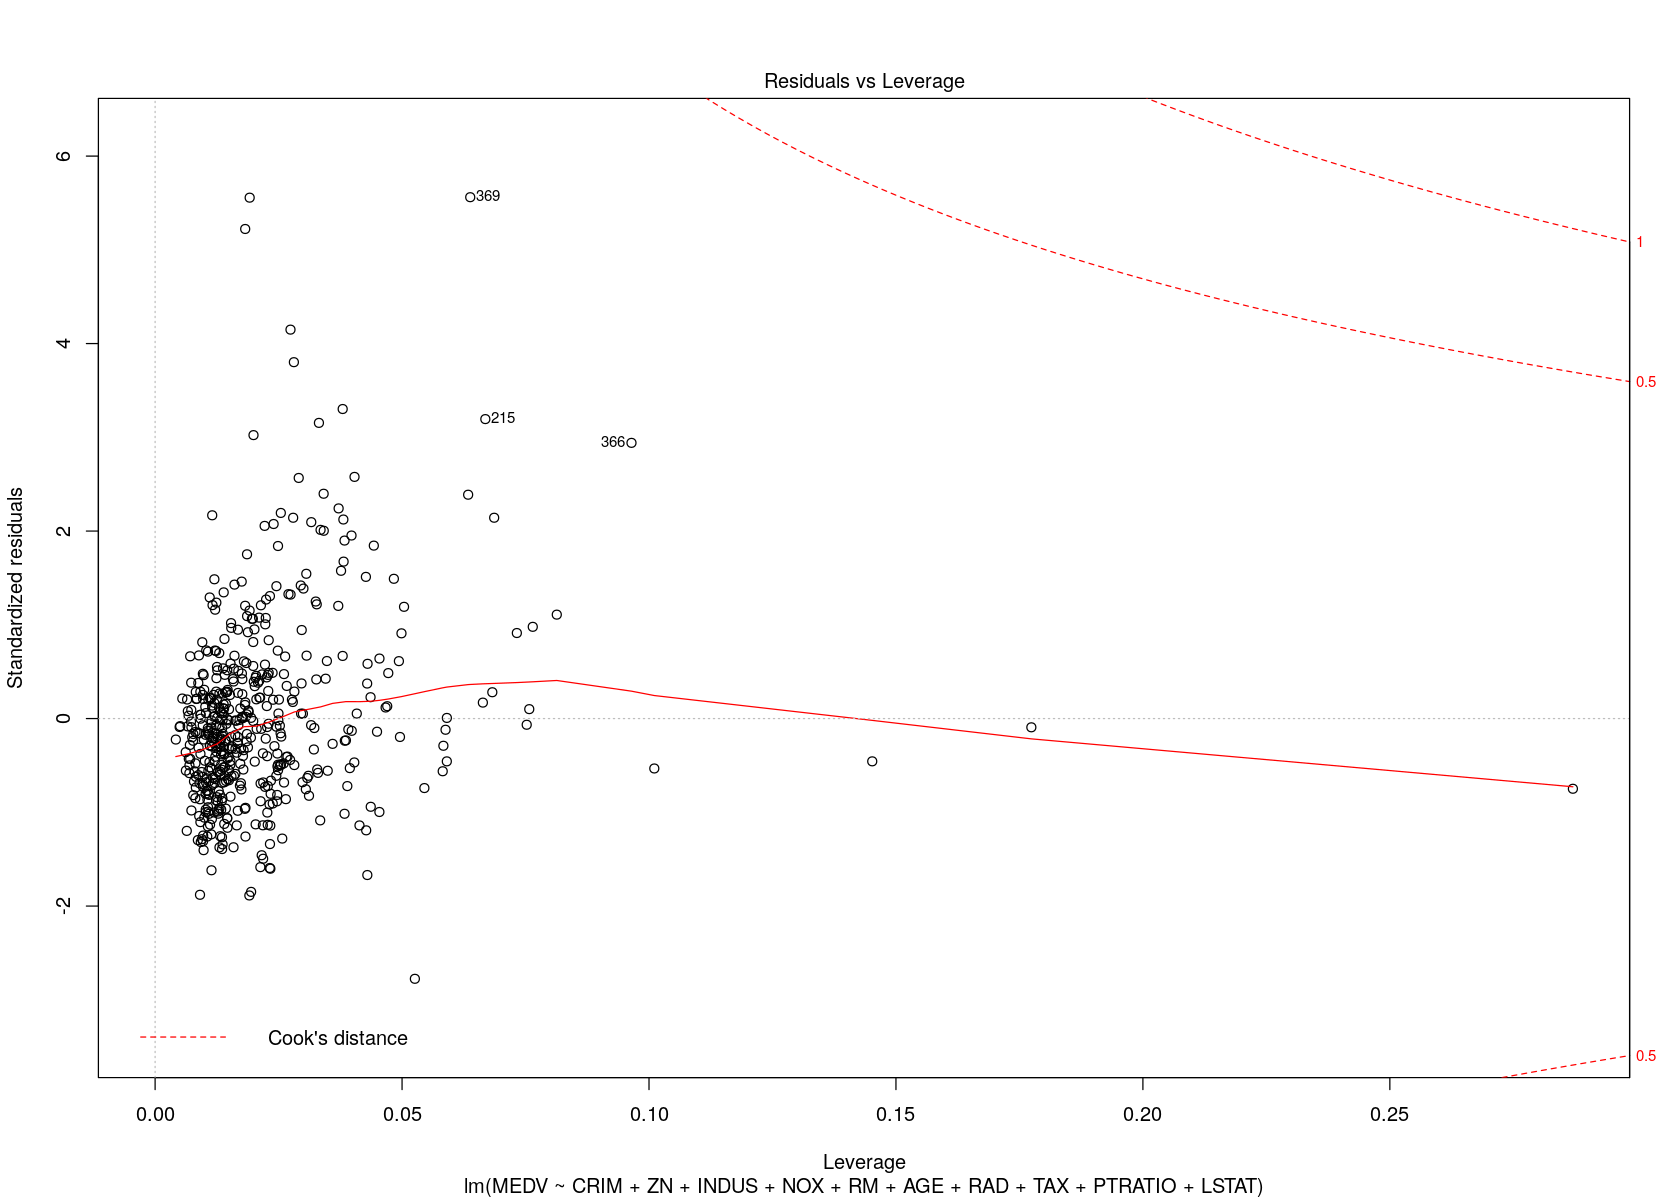

In [19]:
## Validación del modelo
plot(modelo)

## Ajuste de un análisis de componentes principales

In [20]:
## Declaro un vector con las variables que quiero agrupar
var_interes = c("CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "RAD", "TAX", "PTRATIO", "LSTAT")

## Y estandarizo esas variables
data %>%
  select(var_interes) %>%
  mutate_all(scale) -> data_estandarizada

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(var_interes)` instead of `var_interes` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



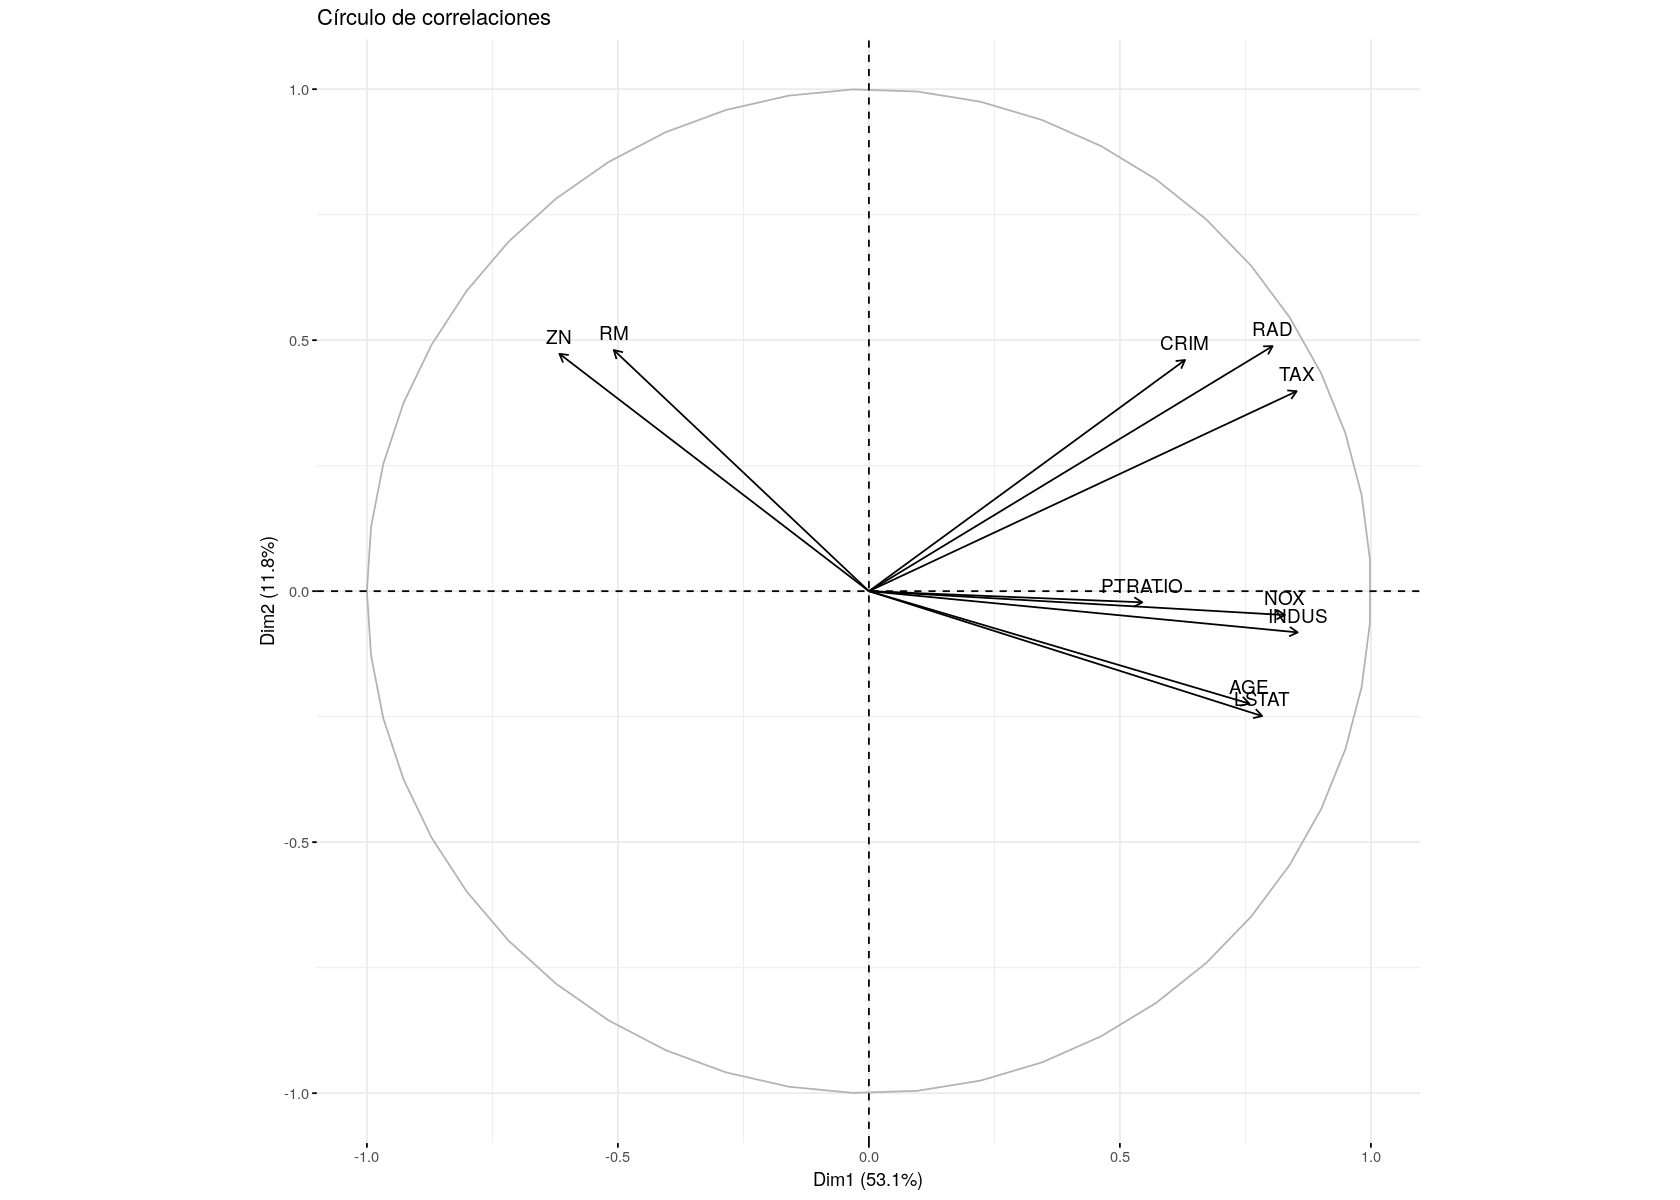

In [21]:
## Ajusto componentes principales usando el método PCA()
acp = PCA(data_estandarizada,graph=F)

## Círculo de correlaciones entre variables
fviz_pca_var(acp, col.var = "black", title="Círculo de correlaciones")

In [22]:
## Componentes principales
eig.val <- get_eigenvalue(acp)
eig.val

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,5.30853032,53.0853032,53.08530
Dim.2,1.18488167,11.8488167,64.93412
Dim.3,1.04779968,10.4779968,75.41212
Dim.4,0.79773274,7.9773274,83.38944
Dim.5,0.53213639,5.3213639,88.71081
Dim.6,0.39186667,3.9186667,92.62947
Dim.7,0.27462043,2.7462043,95.37568
Dim.8,0.22353398,2.2353398,97.61102
Dim.9,0.17418911,1.7418911,99.35291
Dim.10,0.06470901,0.6470901,100.00000


Cuando el valor propio (eigenvalue) de un componente es superior a 1 se suele retener, es decir, la combinación de variables al interior de un “componente” es capaz de explicar más varianza que cada variable por separado.


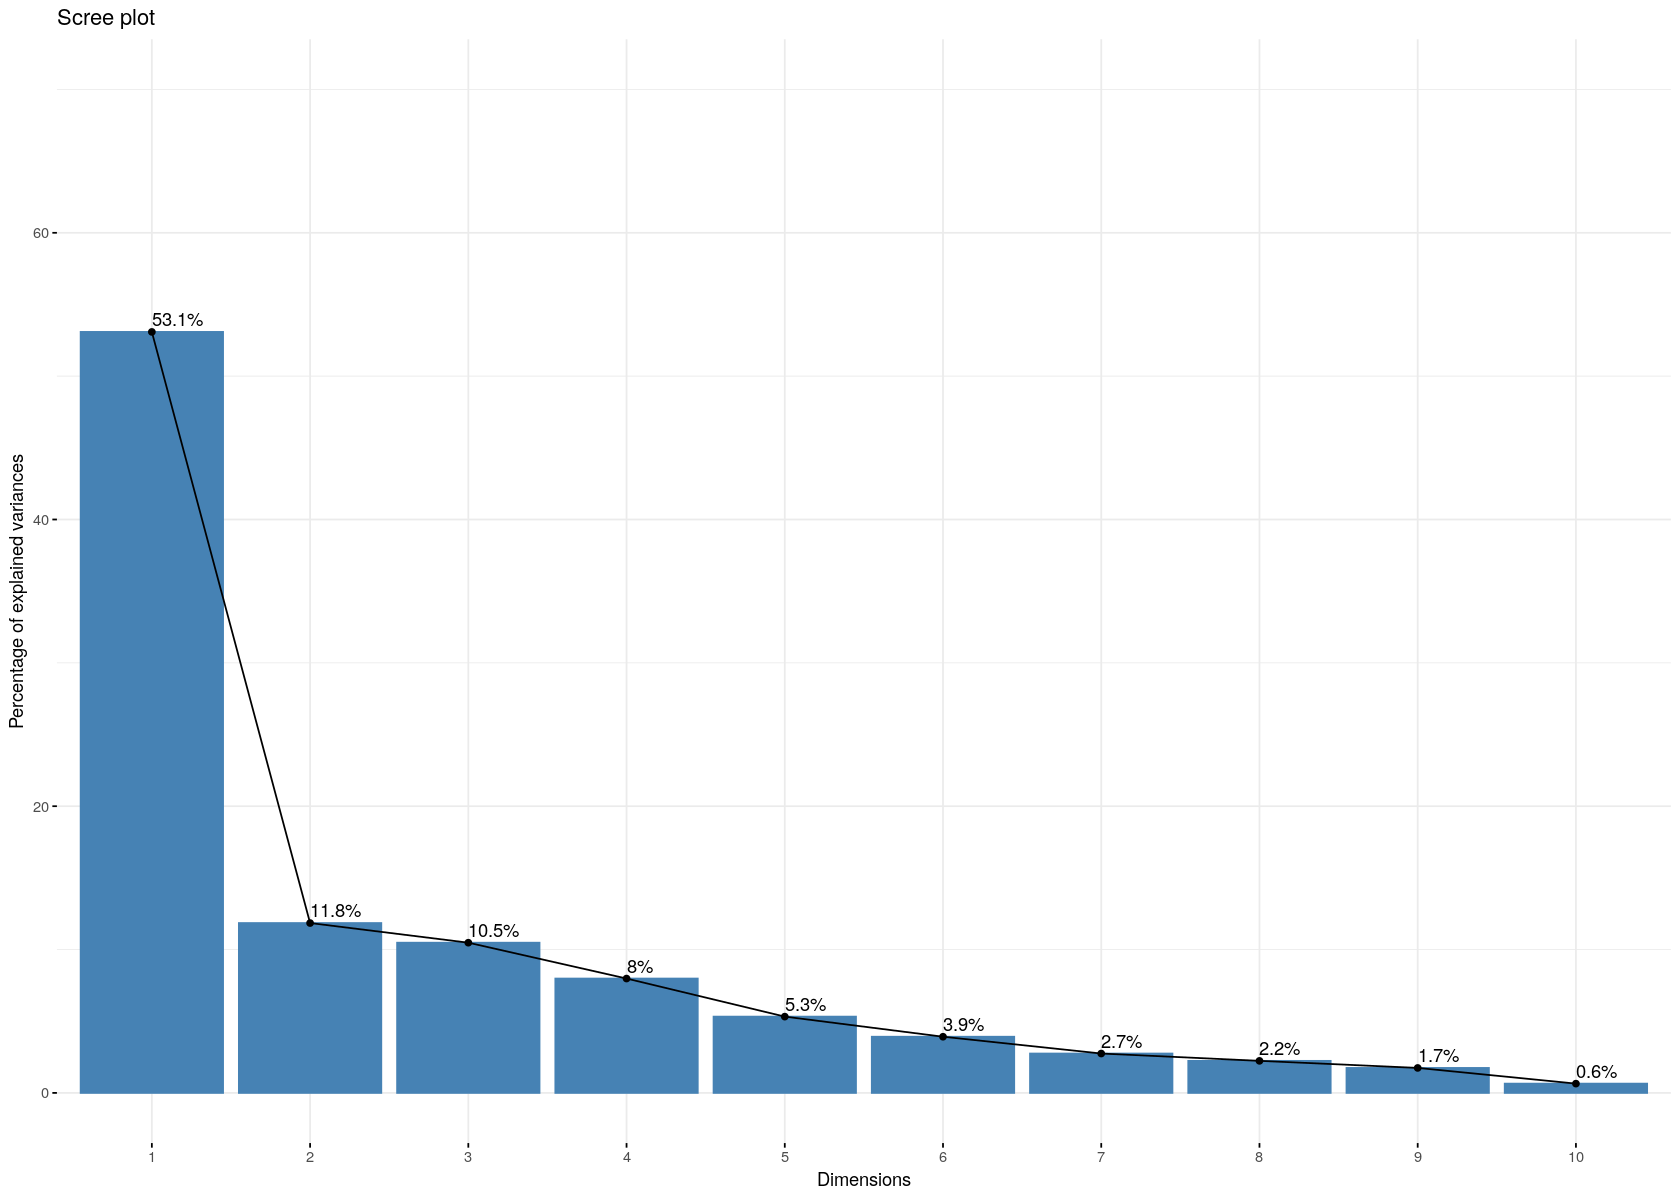

In [23]:
## Gráfico de valores propios (eigenvalue)
fviz_eig(acp, addlabels = TRUE, ylim = c(0, 70))

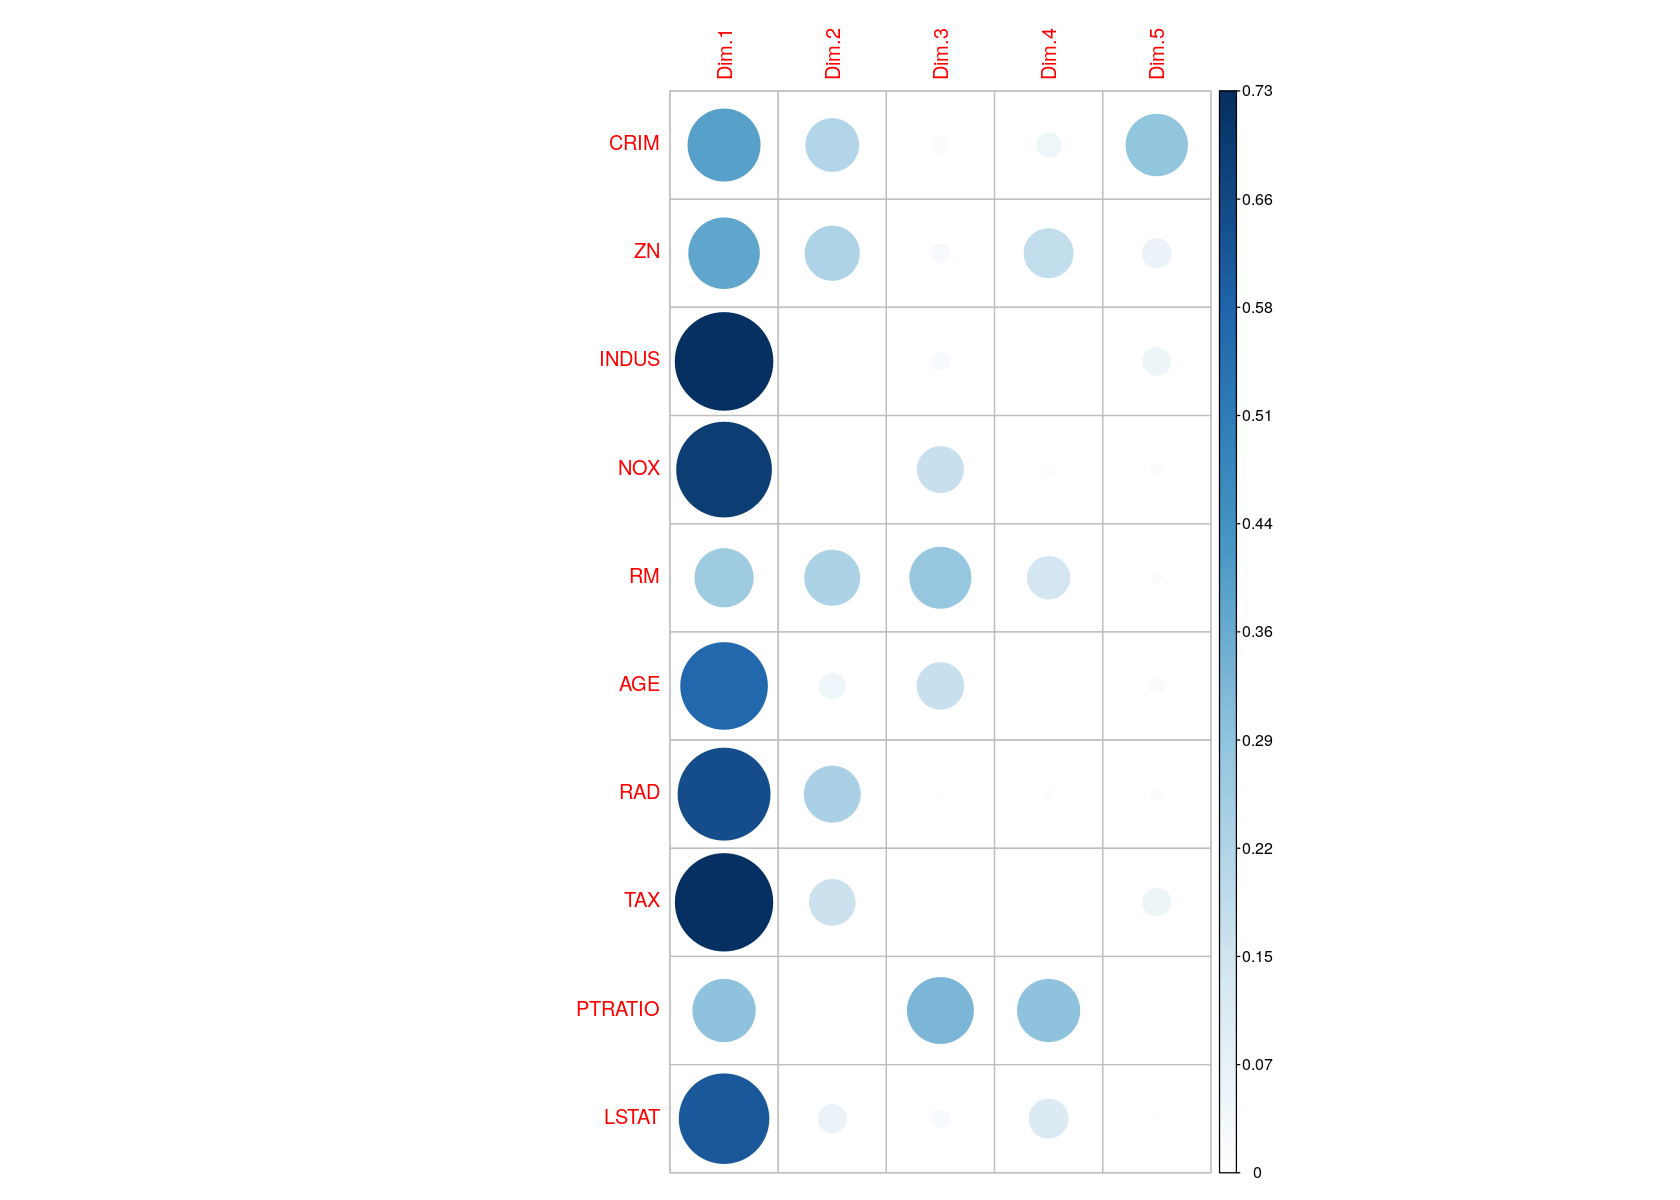

In [24]:
## Extraigo las variables del análisis
var <- get_pca_var(acp)

## Carga de las variables
corrplot(var$cos2, is.corr=FALSE)

Podemos reducir la dimensión del conjunto de datos de 10 variables de interés a 3 nuevas variables llamadas **componentes principales**. Incluso podríamos quedarnos con dos componentes principales según el criterio gráfico del codo.

### Construccion de las nuevas variables

Asumamos que nos vamos a quedar con 2 componentes principales. En la práctica, eso implica que debemos agregar dos nuevas variables a nuestra base de datos:

- Componente 1
- Componente 2

¿Cómo calcular los valores que irían en las celdas?

El análisis por componentes principales nos genera nuevas variables que son una **combinación lineal** de las variables originales.

In [25]:
## Extraemos las cargas de cada variable en cada componente
cargas = sweep(acp$var$coord,2,sqrt(acp$eig[1:ncol(acp$var$coord),1]),FUN="/")
cargas

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
CRIM,0.2732876,0.42302829,-0.13585941,0.23844397,-0.73597627
ZN,-0.2675745,0.43440206,-0.16031511,0.47779984,0.34782714
INDUS,0.3707199,-0.07548864,0.15972327,-0.02060390,0.33129950
NOX,0.3596725,-0.04368252,0.39245803,0.13110354,0.16347109
RM,-0.2205641,0.44126370,0.52083700,-0.41442988,-0.13860143
AGE,0.3288862,-0.20572769,0.39692598,-0.02993753,-0.19401704
RAD,0.3490460,0.44846686,-0.05797233,-0.09661431,0.15602050
TAX,0.3698465,0.36593177,-0.03809258,-0.02695204,0.33118721
PTRATIO,0.2363546,-0.02046652,-0.56310943,-0.60854007,0.01123455
LSTAT,0.3400330,-0.22858307,-0.15994056,0.37974859,-0.09933028


In [26]:
## Veamos solo las cargas del primer componente
cargas[,1]

CRIM         ZN      INDUS        NOX         RM        AGE        RAD 
 0.2732876 -0.2675745  0.3707199  0.3596725 -0.2205641  0.3288862  0.3490460 
       TAX    PTRATIO      LSTAT 
 0.3698465  0.2363546  0.3400330

Con estos valores podemos calcular el valor del primer componente por medio de una combinación lineal de las variables originales:

In [27]:
0.27*CRIM - 0.26*ZN + 0.37*INDUS + 0.35*NOX - 0.22*RM + 0.32*AGE + 0.34*RAD + 0.36*TAX + 0.23*PTRATIO + 0.34*LSTAT

[1] 127.89441 121.62440 114.02292 100.33268 103.81040 105.35676 141.24070
  [8] 152.94549 157.99571 149.02833 152.78808 146.75084 133.55244 141.35576
 [15] 149.26963 139.75582 130.50216 149.93583 134.61311 144.92133 157.56148
 [22] 152.07405 154.60043 157.65732 154.46339 151.94267 152.74406 153.12902
 [29] 153.24991 150.72168 156.75456 155.37363 154.63726 155.60584 156.92804
 [36] 132.76312 131.20454 123.93229 120.77879  84.69166  81.88329  92.84911
 [43]  94.49892  95.01671 106.47545 104.81414 105.97544 124.21780 131.58266
 [50] 115.90540 107.39355 111.51706  96.61370  97.89254 175.80881  71.42161
 [57] 107.64339  84.77260 115.41385 122.01040 129.47995 138.57909 127.64130
 [64] 120.71216  99.38362 112.87888 119.14148 137.37052 144.07857 141.33455
 [71] 122.72914 127.41090 122.78349 122.94671 157.04751 170.26341 180.73688
 [78] 171.00156 174.20485 167.71741 113.38707 125.87597 113.54954 118.48755
 [85] 113.25233 114.74253 113.50856 115.73174 131.36659 123.99379 126.15516
 [92] 128.44437 119.71371 111.19394 128.16661 124.73750 130.20785 129.41389
 [99] 116.72855 125.89665 175.42720 172.05905 177.69107 179.34079 179.76935
[106] 183.38859 182.61090 178.83828 181.95029 181.26800 168.59044 193.66548
[113] 199.52098 200.60748 194.70869 197.87365 191.51956 194.19929 192.91037
[120] 189.81882 108.36388 112.90912 116.98474 120.87853 117.81326 114.49897
[127] 121.17697 207.25581 207.39535 207.41110 206.47676 206.23647 205.73997
[134] 206.32011 208.24413 207.82100 206.31957 206.99755 209.32541 208.27190
[141] 208.76036 214.90865 198.53727 198.59659 198.63692 198.45627 194.71515
[148] 197.93046 196.84370 194.87828 192.74089 193.44078 189.19279 193.92335
[155] 192.60461 188.85026 192.77881 189.14886 190.83160 191.17561 188.08818
[162] 186.00908 188.47283 187.36179 190.26851 190.16001 188.45772 186.28209
[169] 191.37428 191.18308 191.82905 192.17470 145.88133 142.35386 137.75043
[176] 124.73707 130.99096 138.00695 138.42453  94.55661 103.21089  97.45892
[183] 105.26828 106.78136 107.95375 100.82467  92.63231 152.15417 147.65579
[190] 150.92425 145.31101 148.18843 146.03778  88.34055  91.00866  85.51093
[197] 112.62869 115.01026 114.83849 130.55535 130.03105 122.25521 113.20043
[204]  72.01945  71.24338 119.02006 128.64755 137.64763 132.04645 148.24001
[211] 143.52715 144.86523 130.89475 121.60809 121.51799 124.92868 131.39415
[218] 139.24810 144.99327 141.93059 149.90231 154.97985 146.60863 146.86346
[225] 144.44262 146.06937 146.79098 145.97828 124.87479 126.51664 144.29457
[232] 144.59976 142.33044 141.85961 142.37167 141.84295 146.11879 142.75308
[239] 114.71074 122.61336 127.79035 131.76765 127.40372 110.92048 149.72723
[246] 149.73101 135.20244 149.65040 139.74998 128.57599 126.94879 124.88209
[253] 124.03991 124.34628 109.33905 106.16986  81.00807 124.02439 129.43984
[260] 129.24341 124.22312 125.79156 125.80763 128.90123 126.85455 118.85679
[267] 126.99501 118.50056 112.60908 106.15868  99.80005  89.24317 103.12038
[274] 100.29669  99.23283 102.20340 105.14268  97.73737 100.28825  89.58528
[281]  99.28178  91.01576  94.33616  59.20744  92.06599 110.11715  84.38286
[288] 110.88622 115.59724 108.92685  83.71159  83.67448  82.78851 121.86293
[295] 130.15551 125.03291 131.78967 137.09323 123.49616 120.03039 132.48491
[302] 132.80560 125.51977 123.89521  92.85497  99.11127 102.51946 102.48654
[309] 145.50240 145.59970 134.89652 136.68117 150.54380 146.76161 148.63154
[316] 146.47276 150.52645 146.04317 142.61631 140.81312 130.24668 130.78926
[323] 129.78294 139.01965 126.02474 117.49933 122.46345 129.49057 171.77951
[330] 168.03129 173.46199 119.03491 115.76320 101.83395 102.32344 101.53250
[337] 105.95262 110.46026 102.59190 105.62429 109.66880 113.81519 177.41054
[344] 145.23895 135.27135 151.62853 153.60588 121.02058  96.25090 127.20750
[351] 130.51382 150.62684 145.99183  62.02735 115.22200 113.56791 297.74326
[358] 292.79682 290.18024 289.66221 290.15986 293.16983 293.59458 292.85349
[365] 286.84736 290.50976 293.42862 298.81718 292.

De igual manera procedemos con el segundo componente:

In [28]:
cargas[,2]

CRIM          ZN       INDUS         NOX          RM         AGE 
 0.42302829  0.43440206 -0.07548864 -0.04368252  0.44126370 -0.20572769 
        RAD         TAX     PTRATIO       LSTAT 
 0.44846686  0.36593177 -0.02046652 -0.22858307

In [29]:
0.42*CRIM + 0.43*ZN - 0.07*INDUS - 0.04*NOX + 0.44*RM - 0.20*AGE + 0.44*RAD + 0.36*TAX - 0.02*PTRATIO - 0.22*LSTAT

[1] 103.01083  72.17625  77.19660  73.98100  71.85616  70.65062 105.28690
  [8]  98.00253  94.64090 100.43032  98.20047 101.85304 110.03349  99.97354
 [15]  95.06166 100.93574 107.01513  94.66624 104.11466  97.71180  90.00083
 [22]  93.36854  92.03040  89.86794  91.78435  93.31307  92.79040  92.76918
 [29]  92.75514  94.53067  90.46534  91.64054  91.97344  91.22384  90.77350
 [36]  88.68671  89.63960  94.19710  96.24880 121.30338 123.20945  85.72790
 [43]  84.51597  84.20335  76.96127  77.90626  77.19233  65.85387  60.98437
 [50]  70.93356  88.08363  85.55586  95.02739  94.04708 191.51203 119.55735
 [57] 144.10355 130.98521 111.15825 106.92164 102.19453  96.57914 103.58513
 [64] 107.99719  75.58271 155.10143 150.99805 127.06437 122.79423 124.62517
 [71] 110.46493 107.41870 110.33547 110.33384 144.29210 136.02941 129.46242
 [78] 135.50919 133.50141 137.48821 108.04611 100.19546 107.80261 104.66895
 [85]  80.65375  79.82243  80.35693  79.04421  82.10259  86.72877  85.15069
 [92]  83.71645  99.90157 105.16335  94.54243  89.60316  86.00514  87.13481
 [99]  94.96969  89.08995 124.37192 126.48625 122.89768 121.75436 121.46151
[106] 119.06874 119.55654 122.01317 120.18493 120.59248 128.43313 141.52317
[113] 137.58872 137.01539 140.75395 138.65450 142.70532 141.00807 141.71854
[120] 143.62966  51.86964  49.07171  46.49656  44.00886  45.95979  48.12589
[127]  43.87447 136.73070 136.91926 136.97434 137.53109 138.14601 138.12384
[134] 137.41234 136.55361 136.74921 137.43073 137.19668 135.45034 136.39268
[141] 135.90228 132.42093 123.45232 123.89499 122.90157 123.16108 125.29900
[148] 123.10622 123.85102 125.49251 126.40801 125.66517 127.99260 125.82138
[155] 126.34474 129.94774 126.57705 128.67022 127.40963 127.41767 129.14605
[162] 130.96037 129.73186 130.40379 128.18795 128.74552 129.87024 130.42240
[169] 127.67573 127.90648 126.58872 127.04364  89.70242  92.17689  94.87674
[176] 103.23973  99.13819  94.86169  94.76800  60.55896  55.37335  58.46557
[183]  53.93831  52.81243  51.71733  56.33200  62.02245 157.59527 160.38199
[190] 158.49847 161.94225 160.07011 161.57103 121.02145 119.29506 124.04032
[197] 148.85097 147.27792 147.44543 185.45001 185.81885 154.59345 160.71564
[204] 118.74362 119.28155  96.14508  90.31365  84.48430  88.02717  77.80170
[211]  80.82341  79.88713  88.70684  94.68756  94.38903  92.58699  88.67537
[218]  84.03783  80.20023  82.29980  96.61036  93.13992  98.80178  98.57581
[225] 100.43652  99.67955  98.94734  99.18356 112.48252 111.19907  99.91202
[232] 100.15856 101.94422 102.05662 101.31428 101.36075  98.97520 101.32961
[239] 120.63284 115.72988 112.56444 109.82415 112.63812 123.01048 115.02803
[246] 114.97592 124.36561 115.27956 121.51572 128.62339 129.54577 130.88340
[253] 131.48957 131.86067 142.50388 144.38686 123.02576  90.85643  87.06761
[260]  87.04449  90.20259  89.33215  89.58960  87.47171  88.57589  93.18350
[267]  88.51857  94.13588  97.57771  76.66211  80.74453  87.42613  78.80649
[274]  80.99187 105.22204 103.42192 101.69187 106.17539 104.46521  83.58982
[281]  77.73981  82.64286  80.79853 107.88448 138.44563 126.26426 114.70225
[288] 124.89182 121.98028 126.20885 120.33401 120.46810 120.83144 101.65111
[295]  96.41852  99.88135  95.56644  92.01015 158.41676 160.78980 152.93759
[302] 128.11884 132.68370 133.87926  90.11292  85.99997  84.14343  83.96819
[309]  95.74489  95.35827 103.07146 101.26729  92.21887  94.68942  93.66018
[316]  94.66394  92.18047  94.91751  97.37497  98.44606  95.44551  95.10199
[323]  95.72320  89.77965  98.19114 103.44430 100.36342  95.81563 151.23311
[330] 153.73676 150.25944 118.26742 120.43588  75.98289  75.65920  76.06282
[337]  73.23285  70.41547  75.39975  73.48579  70.96005 109.41962 140.93407
[344] 148.51136 154.81721 117.98165 116.71262 159.94003 132.12980 132.61088
[351] 130.42743 169.55961 172.22484 102.47970 152.16856 153.34099 231.77232
[358] 231.92947 234.29322 234.04983 234.02713 231.63831 231.04053 231.92412
[365] 236.19888 232.95419 230.99672 233.07020 232.

Ya sabemos las ecuaciones de nuestros componentes, ahora los vamos a agregar a nuestra base de datos:

In [30]:
## Definimos una función para hacer la multiplicación
## De cada variable en los datos estandarizados por su respectivo "ponderador"
calcpc <- function(variables,loadings)
{
  # Número de observaciones en el conjunto de datos
  as.data.frame(variables)
  numsamples <- nrow(variables)
  # Creamos un vector para alojar el componente
  pc <- numeric(numsamples)
  # Número de variables en el conjunto de datos
  numvariables <- length(variables)
  # Calculo del valor del componente para cada observacion
  for (i in 1:numsamples)
  {
    valuei <- 0
    for (j in 1:numvariables)
    {
      valueij <- variables[i,j]
      loadingj <- loadings[j]
      valuei <- valuei + (valueij * loadingj)
    }
    pc[i] <- valuei
  }
  return(unlist(pc))
}

## Cálculo del primer componente
comp1 = calcpc(data_estandarizada, cargas[,1])

## Cálculo del segundo componente
comp2 = calcpc(data_estandarizada, cargas[,2])

## Agregamos los componentes a la base de datos
data %>% 
  add_column(comp1 = comp1, comp2 = comp2) -> data_con_componentes

## Podemos crear una versión reducida de nuestro conjunto de datos
data_con_componentes %>%
  select(comp1, comp2, MEDV) -> data_reducida

## Variación en la dimensionalidad de los datos
dim(data)

[1] 506  14

In [31]:
dim(data_estandarizada)

[1] 506  10

In [32]:
dim(data_con_componentes)

[1] 506  16

In [33]:
dim(data_reducida)

[1] 506   3

## Observación de cierre

Todo el análisis multivariado realizado hasta el momento se ha enfocado en entender el comportamiento de las **variables (columnas)**. Siguiendo los mismos principios y herramientas de análisis, podríamos enfocarnos también en las **observaciones (filas)** e igualmente buscar similitudes, diferencias y grupos de individuos.

 
